In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import glob 
from numpy.linalg import eig
import seaborn as sns
sns.set()
%matplotlib inline

In [59]:
df = pd.concat([pd.read_csv(f, usecols=[0,5], index_col = [0]) for f in glob.glob('*.csv')], ignore_index = True, axis = 1)

In [71]:
df.columns = [x[0:3] for x in files]
df.head()

XLB        XLE       XLF        XLI        XLK        XLP  \
Date                                                                          
1998-12-22  13.326187  16.030661  9.767839  16.370098  25.580147  17.100040   
1998-12-23  13.466161  16.364420  9.911845  16.655781  26.191339  17.513418   
1998-12-24  13.776071  16.278292  9.977332  16.875517  26.091562  17.483175   
1998-12-28  13.656102  16.192167  9.846398  16.963413  26.166361  17.382345   
1998-12-29  13.906034  16.353655  9.951146  17.205086  26.241230  17.765488   

                  XLU        XLV        XLY  
Date                                         
1998-12-22  14.737362  19.090425  20.134567  
1998-12-23  14.675605  19.519430  20.221031  
1998-12-24  14.945813  19.638632  20.591616  
1998-12-28  14.868592  19.352631  20.406319  
1998-12-29  15.115628  19.781630  20.851015

In [72]:
ret = df.pct_change().dropna()
ret.head()

XLB       XLE       XLF       XLI       XLK       XLP  \
Date                                                                     
1998-12-23  0.010504  0.020820  0.014743  0.017452  0.023893  0.024174   
1998-12-24  0.023014 -0.005263  0.006607  0.013193 -0.003810 -0.001727   
1998-12-28 -0.008709 -0.005291 -0.013123  0.005208  0.002867 -0.005767   
1998-12-29  0.018302  0.009973  0.010638  0.014247  0.002861  0.022042   
1998-12-30 -0.002876 -0.015142 -0.003949 -0.004471 -0.003802 -0.006243   

                 XLU       XLV       XLY  
Date                                      
1998-12-23 -0.004191  0.022472  0.004294  
1998-12-24  0.018412  0.006107  0.018327  
1998-12-28 -0.005167 -0.014563 -0.008999  
1998-12-29  0.016615  0.022167  0.021792  
1998-12-30 -0.008172 -0.008436 -0.008294

In [116]:
## Get Eigenvectors and Eigenvalues
values, vectors = eig(ret.cov())


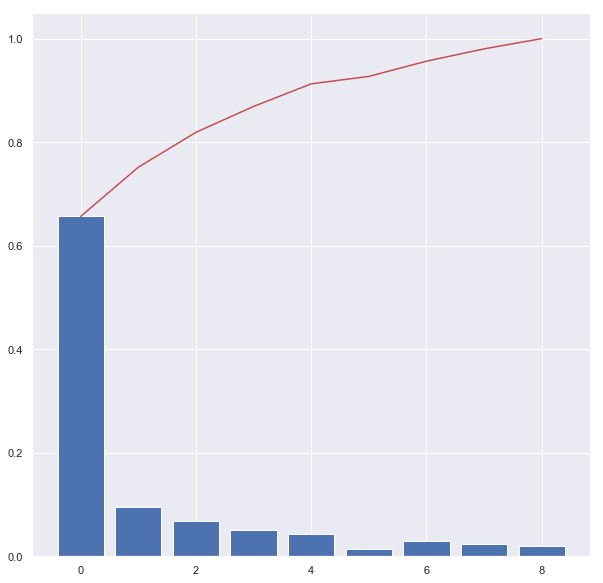

In [117]:
x = list(range(len(values)))
y = [x / sum(values) for x in values]

plt.figure(figsize =(10,10))
plt.bar(x, y)
plt.plot(np.cumsum(y), color = 'r')


In [107]:
vectors

array([[ 0.36724074, -0.25759109, -0.02421348, -0.26722406, -0.58114996,
         0.30962226, -0.48744441,  0.22066421, -0.08300673],
       [ 0.36592793, -0.76377526, -0.00374225, -0.19898568,  0.39719585,
         0.00691412,  0.27937528, -0.08468138,  0.01004817],
       [ 0.47385728,  0.34301962,  0.73710623, -0.0492172 ,  0.29013107,
         0.05331697, -0.08060936,  0.13240161, -0.03165582],
       [ 0.3429668 ,  0.04742317, -0.0904603 , -0.07419323, -0.22988253,
        -0.90100327, -0.03262582, -0.02605067,  0.00641568],
       [ 0.36124148,  0.38157249, -0.6270062 , -0.1976122 ,  0.43125889,
         0.13346336, -0.19862066, -0.0358322 , -0.21722996],
       [ 0.18224429, -0.00686116,  0.02709067,  0.37987377, -0.22940792,
         0.08153579,  0.31360949, -0.17363719, -0.79619413],
       [ 0.21317937, -0.17945527, -0.08793246,  0.81314346,  0.14847009,
        -0.00661177, -0.41989757, -0.02889896,  0.23276544],
       [ 0.24753936,  0.11942812, -0.210308  ,  0.19104762, -0

In [119]:
import scipy.stats as ss
def BS_Call(S,K,r,T,v,d=0):
    d1 = (np.log(float(S)/K)+((r-d)+v*v/2.)*T)/(v*np.sqrt(T))
    d2 = d1-v*np.sqrt(T)
    return S*np.exp(-d*T)*ss.norm.cdf(d1)-K*np.exp(-r*T)*ss.norm.cdf(d2)

In [126]:
x=0
for S in range(1,100,1):
    for K in range (1, 100, 1):
        for T in np.arange(0.05,1,0.1):
            print(BS_Call(S,K,0.05,T,0.4))
            x+=1
            print(x)


0.03688840421999473
1
0.06531935496034308
2
0.08552606881568875
3
0.10229806320140233
4
0.1170328599330383
5
0.13037208381142823
6
0.14267427095215401
7
0.15416413554132624
8
0.16499367320287656
9
0.17527146187031284
10
9.092074219924419e-17
11
2.1667931219377604e-07
12
2.3947311670970248e-05
13
0.0002082963026396687
14
0.0007478936740314794
15
0.0017675464810345265
16
0.003307496851657824
17
0.0053541376693439155
18
0.007867405962193444
19
0.010797369785589206
20
9.843932037329965e-37
21
3.426887042851402e-14
22
1.6684692921704356e-09
23
1.9994457167110546e-07
24
3.109527104935241e-06
25
1.878846450388197e-05
26
6.761894702594505e-05
27
0.00017738536736586858
28
0.0003779491217026209
29
0.0006968617846070044
30
3.1012981072839077e-56
31
9.419797481254592e-21
32
1.7904687428939242e-13
33
2.781223519670969e-10
34
1.8011134865059686e-08
35
2.7037004835495484e-07
36
1.8301462821868686e-06
37
7.640054648829232e-06
38
2.3246363674772955e-05
39
5.6833429631118065e-05
40
1.981621650023171e-74

1.1354423729158423e-26
630
0.0
631
8.008487545473022e-160
632
6.781247906823377e-97
633
7.508188254595423e-70
634
8.729148973969112e-55
635
3.578759929484943e-45
636
1.6838559938235184e-38
637
1.3561323992260515e-33
638
7.827707313434569e-30
639
7.424940850304561e-27
640
0.0
641
5.455261945873329e-161
642
1.3557265580851723e-97
643
2.3812183970938316e-70
644
3.577439211034437e-55
645
1.726572947729394e-45
646
9.095154164041492e-39
647
7.957568379697201e-34
648
4.893535612515852e-30
649
4.879781459312652e-27
650
0.0
651
3.8340260461601317e-162
652
2.7616585239374213e-98
653
7.65363309043091e-71
654
1.4814324818204545e-55
655
8.400832871286496e-46
656
4.947998891716145e-39
657
4.6984496726184025e-34
658
3.076003209138357e-30
659
3.2227818031972532e-27
660
0.0
661
2.777945805390321e-163
662
5.72923147213329e-99
663
2.492256542015975e-71
664
6.197063984556008e-56
665
4.121459395974486e-46
666
2.7107174891941936e-39
667
2.79097568397485e-34
668
1.943865301553915e-30
669
2.1386046590546235e-

1151
1.3229697054439302e-44
1152
1.0588090323477548e-27
1153
2.203248189365099e-20
1154
2.810164609811361e-16
1155
1.2201027323641454e-13
1156
8.501388169874563e-12
1157
1.9651598987405946e-10
1158
2.216533908160932e-09
1159
1.526371828539529e-08
1160
6.353628105933649e-135
1161
7.516609444007831e-47
1162
4.7498569201149444e-29
1163
2.396677729596697e-21
1164
5.000975208079344e-17
1165
2.970354019001497e-14
1166
2.571320971426329e-12
1167
6.969740318230307e-11
1168
8.879758517270216e-10
1169
6.7325492210657425e-09
1170
1.8730995534364372e-141
1171
4.989379498961072e-49
1172
2.34054074828305e-30
1173
2.7889508721836303e-22
1174
9.381511355097908e-18
1175
7.551671057058005e-15
1176
8.069042310211258e-13
1177
2.552466501147985e-11
1178
3.6598493944805474e-10
1179
3.0463274777312224e-09
1180
8.529303161800596e-148
1181
3.8314507903211415e-51
1182
1.2592914334109785e-31
1183
3.456788307388765e-23
1184
1.8488421468971634e-18
1185
1.9992587676004653e-15
1186
2.6207876552805955e-13
1187
9.6317

2.727504802328408e-119
1702
1.7425467208251328e-72
1703
2.3752095709894306e-52
1704
4.0023107012009273e-41
1705
5.916983372183259e-34
1706
5.666547968775353e-29
1707
2.6238149351435475e-25
1708
1.7048634932105125e-22
1709
2.882903318691557e-20
1710
0.0
1711
3.476522281902498e-120
1712
5.0703310683587003e-73
1713
9.844393646265467e-53
1714
2.0190813357940343e-41
1715
3.3826984174542496e-34
1716
3.5325607152774726e-29
1717
1.7429514118996516e-25
1718
1.1888704433269454e-22
1719
2.088952288001793e-20
1720
0.0
1721
4.522057770995108e-121
1722
1.4933840661775577e-73
1723
4.115731974038508e-53
1724
1.0254811764609588e-41
1725
1.9445643998466612e-34
1726
2.2125166999538482e-29
1727
1.162496483870383e-25
1728
8.320051724231146e-23
1729
1.518481572848078e-20
1730
0.0
1731
5.999940516880298e-122
1732
4.451177463692078e-74
1733
1.735377882262106e-53
1734
5.24286284350786e-42
1735
1.1238935880095086e-34
1736
1.3920828603819165e-29
1737
7.78419956012026e-26
1738
5.842924559211451e-23
1739
1.1072427

5.582502193551821e-28
2233
1.5654009956371856e-20
2234
2.356616355436262e-16
2235
1.1370657937080455e-13
2236
8.523590754625581e-12
2237
2.0788369591723528e-10
2238
2.442958635214866e-09
2239
1.7377120413949074e-08
2240
9.530442158900786e-135
2241
1.1274914166011684e-46
2242
7.124785380172506e-29
2243
3.5950165943950514e-21
2244
7.501462812119006e-17
2245
4.455531028502245e-14
2246
3.8569814571395e-12
2247
1.0454610477345502e-10
2248
1.331963777590529e-09
2249
1.0098823831598614e-08
2250
4.0169462050019704e-139
2251
3.916469529415113e-48
2252
9.480487097354505e-30
2253
8.507223451996334e-22
2254
2.44441820174524e-17
2255
1.779821619276242e-14
2256
1.7741117314908784e-12
2257
5.333127793793714e-11
2258
7.354432905425896e-10
2259
5.9358860876319155e-09
2260
2.062427633755636e-143
2261
1.4534839744983655e-49
2262
1.312876792365883e-30
2263
2.0716649641197312e-22
2264
8.145734803427866e-18
2265
7.241787650440747e-15
2266
8.289057880426555e-13
2267
2.7578099564800878e-11
2268
4.109964327636

1.6290369481876215e-298
2781
3.082907355698459e-101
2782
1.354296801280967e-61
2783
1.5718725410762021e-44
2784
5.217931566496508e-35
2785
6.33712204691124e-29
2786
1.0755562960791122e-24
2787
1.3999841059849678e-21
2788
3.4466384854139483e-19
2789
2.708663029198575e-17
2790
1.0317637261956582e-300
2791
5.713783570580555e-102
2792
4.931136781664576e-62
2793
7.644384321349153e-45
2794
2.9802735793654084e-35
2795
4.009513237353588e-29
2796
7.304702604736704e-25
2797
1.0015186414688024e-21
2798
2.5656071175687626e-19
2799
2.080539730476696e-17
2800
6.821241537193233e-303
2801
1.074229307376769e-102
2802
1.8109446628747695e-62
2803
3.7404816462292255e-45
2804
1.7103378294005422e-35
2805
2.5467280269543685e-29
2806
4.977398724187024e-25
2807
7.185121937441743e-22
2808
1.914597088541824e-19
2809
1.6016746297907282e-17
2810
4.703589722610142e-305
2811
2.0481557931034275e-103
2812
6.706839490547358e-63
2813
1.8412895872809816e-45
2814
9.861354151626567e-36
2815
1.6238009278819246e-29
2816
3.40

2.8231650820279093e-09
3370
1.3436811157141873e-150
3371
7.072246198431093e-52
3372
6.027380180483285e-32
3373
2.489157819389683e-23
3374
1.6704949720580366e-18
3375
2.0871592860867252e-15
3376
3.0239097064943675e-13
3377
1.195957380063849e-11
3378
2.0343850667422197e-10
3379
1.9380423419784954e-09
3380
1.1684846533676355e-153
3381
6.7470405156908995e-53
3382
1.4715455936276076e-32
3383
9.091220069090908e-24
3384
7.631620318979104e-19
3385
1.0995110088491918e-15
3386
1.7581703758043348e-13
3387
7.475510869558021e-12
3388
1.3440166766531133e-10
3389
1.3376011638750411e-09
3390
1.1185091772227588e-156
3391
6.64702453398465e-54
3392
3.662926252102407e-33
3393
3.366833556186057e-24
3394
3.52447925088506e-19
3395
5.843961416121001e-16
3396
1.0299891993735743e-13
3397
4.703451345118559e-12
3398
8.930962409377469e-11
3399
9.280094274116503e-10
3400
1.1752129386641533e-159
3401
6.755918320959073e-55
3402
9.29052245909862e-34
3403
1.263772978072801e-24
3404
1.6448903954944533e-19
3405
3.1330038

1.3441063532208917
3998
1.387140483119203
3999
1.428619913591049
4000
0.18444202109997354
4001
0.3265967748017151
4002
0.4276303440784437
4003
0.5114903160070119
4004
0.5851642996651911
4005
0.6518604190571411
4006
0.7133713547607696
4007
0.7708206777066313
4008
0.8249683660143825
4009
0.8763573093515644
4010
0.004036137370829598
4011
0.054708105904745064
4012
0.11954948387968134
4013
0.18394292564135317
4014
0.24568419029703525
4015
0.30456326089119434
4016
0.3607792961536054
4017
0.41460218440610097
4018
0.4662890664956336
4019
0.5160654589601807
4020
1.1879689405203402e-05
4021
0.005520350881358646
4022
0.025978300683958455
4023
0.05673734395895691
4024
0.09303998785137946
4025
0.13222933720207852
4026
0.17285422316350285
4027
0.2140948198474717
4028
0.25547176185158404
4029
0.29669750805954975
4030
8.727773955896025e-09
4031
0.00039165374511795914
4032
0.004754388114936364
4033
0.015802742487599525
4034
0.03296157590435528
4035
0.05483352626032789
4036
0.08016454643064502
4037
0.10

3.3248924428980043e-53
4482
1.0522301809437294e-32
4483
7.625332270444276e-24
4484
6.994576124784287e-19
4485
1.0662419722215792e-15
4486
1.7729310731298598e-13
4487
7.757542246403944e-12
4488
1.4256533003403676e-10
4489
1.4436419390737783e-09
4490
3.5208419234197396e-157
4491
5.246603185993078e-54
4492
3.474848215224787e-33
4493
3.455882600385942e-24
4494
3.7796598986137964e-19
4495
6.444245568580959e-16
4496
1.1579282051868347e-13
4497
5.3631023214934406e-12
4498
1.0294439351280608e-10
4499
1.0788790835290626e-09
4500
1.4690161733302563e-159
4501
8.444897901198725e-55
4502
1.1613153073873248e-33
4503
1.5797162225910072e-24
4504
2.0561129943680685e-19
4505
3.9162547745544833e-16
4506
7.597895162665052e-14
4507
3.722760401733543e-12
4508
7.46011924086129e-11
4509
8.08872436832814e-10
4510
6.494521783221009e-162
4511
1.3858743293507498e-55
4512
3.926729517923184e-34
4513
7.281662297235047e-25
4514
1.1258347731639177e-19
4515
2.392737028795614e-16
4516
5.008156574733056e-14
4517
2.594349

0.42896725485433285
5030
4.4365589405436593e-07
5031
0.0018280087384563784
5032
0.013566504319285827
5033
0.03629459637783855
5034
0.06688341386130447
5035
0.10262465218156736
5036
0.14168048203908434
5037
0.1828460235968289
5038
0.22532518838842153
5039
0.2685827962270231
5040
7.603189575546172e-10
5041
0.00018400730520784937
5042
0.0031533049496780888
5043
0.012192019493669243
5044
0.027711180388534346
5045
0.04874585770993073
5046
0.07413039245602238
5047
0.10285217522925505
5048
0.1341073297439066
5049
0.16727563536482726
5050
7.686404632753276e-13
5051
1.617626315224502e-05
5052
0.0006871839446024562
5053
0.003947649676626676
5054
0.011223501600300737
5055
0.02282064063264641
5056
0.03842898069252171
5057
0.05752450107673868
5058
0.07955891147012156
5059
0.10403228191648217
5060
5.455244531954651e-16
5061
1.300075873162663e-06
5062
0.00014368387002582127
5063
0.0012497778158380123
5064
0.004487362044188883
5065
0.010605278886207159
5066
0.019844981109946924
5067
0.0321248260160634

5686
6.140271430454885e-15
5687
4.3146309874438833e-13
5688
1.1392105632910905e-11
5689
1.5357987865344683e-10
5690
1.4527194524208665e-176
5691
2.0485234274903045e-60
5692
5.344791568412334e-37
5693
6.887086141478976e-27
5694
3.1267127487559856e-21
5695
1.3190745739721958e-17
5696
4.438608607505421e-15
5697
3.2572418355299496e-13
5698
8.89051742241409e-12
5699
1.2303893823179955e-10
5700
2.1951296624609987e-178
5701
5.065861290617713e-61
5702
2.3117902268883148e-37
5703
3.785516466584343e-27
5704
1.963381428095991e-21
5705
9.015552551803765e-18
5706
3.217044056937241e-15
5707
2.4646520056937e-13
5708
6.952376278107519e-12
5709
9.875118159987957e-11
5710
3.4294510506763735e-180
5711
1.266798866915248e-61
5712
1.0066505698089048e-37
5713
2.090740871399984e-27
5714
1.2375050552391764e-21
5715
6.180848946925225e-18
5716
2.337744563082157e-15
5717
1.869141501561647e-13
5718
5.4476158641802375e-12
5719
7.93997092557944e-11
5720
5.5363098757700685e-182
5721
3.202716440781466e-62
5722
4.41235

3.0684414574871444e-14
6243
1.3579611687737868e-10
6244
1.5745064696080566e-08
6245
3.425954411332516e-07
6246
2.999949972450743e-06
6247
1.5130958906169935e-05
6248
5.3218377121162157e-05
6249
0.00014591435858729183
6250
5.90764522640463e-66
6251
1.8943559899476575e-23
6252
9.16421741328597e-15
6253
5.7074166362916476e-11
6254
8.002431921737676e-09
6255
1.9653749869783658e-07
6256
1.8717067979037429e-06
6257
1.004084932044769e-05
6258
3.702366589350192e-05
6259
0.00010537551763215329
6260
1.5865147213438873e-68
6261
2.608992494543918e-24
6262
2.7752324227979937e-15
6263
2.423385873180035e-11
6264
4.100495099343504e-09
6265
1.1351983494698115e-07
6266
1.174687905486476e-06
6267
6.6978852525880655e-06
6268
2.587798229009751e-05
6269
7.642421754807283e-05
6270
4.5438566648040604e-71
6271
3.6738178176725733e-25
6272
8.520346010128821e-16
6273
1.039375713684299e-11
6274
2.118016375441674e-09
6275
6.600954058533933e-08
6276
7.41510905876284e-07
6277
4.4907664679733856e-06
6278
1.81705984107

1.360256188020287e-16
6746
3.271215558791977e-14
6747
1.876277890995316e-12
6748
4.2414453957103975e-11
6749
5.0580284161227e-10
6750
1.0369064335552079e-167
6751
2.0272027285843282e-57
6752
3.5618147438144027e-35
6753
1.4439345985733436e-25
6754
3.4477541481877163e-20
6755
9.662608202211602e-17
6756
2.4494681672992424e-14
6757
1.4603265145295229e-12
6758
3.400246369574525e-11
6759
4.150697516674768e-10
6760
2.4688054953258943e-169
6761
5.832455897468819e-58
6762
1.686884796673772e-35
6763
8.467254072225506e-26
6764
2.276593895025939e-20
6765
6.881102943231581e-17
6766
1.8380568818824106e-14
6767
1.1386907336187291e-12
6768
2.7303409087036922e-11
6769
3.4111228695491153e-10
6770
6.037561928681602e-171
6771
1.693145359115339e-58
6772
8.032296558781644e-36
6773
4.9844126293865906e-26
6774
1.5077943146282816e-20
6775
4.912402533449533e-17
6776
1.3821507843675629e-14
6777
8.895110897221696e-13
6778
2.1959456996788973e-11
6779
2.807369133809565e-10
6780
1.5159338644700325e-172
6781
4.958653

6.977185958442376e-05
7279
0.0001886188293664466
7280
1.3348370105996754e-64
7281
5.882873687181588e-23
7282
1.9131153661852435e-14
7283
1.0048421175325065e-10
7284
1.2815324061088767e-08
7285
2.963001463231629e-07
7286
2.7061050387230105e-06
7287
1.4077467538367973e-05
7288
5.069971192792945e-05
7289
0.00014163706264739076
7290
7.277877026552979e-67
7291
1.026709623319912e-23
7292
6.6809198545024076e-15
7293
4.725080460023373e-11
7294
7.110626617694922e-09
7295
1.8268501370169704e-07
7296
1.7949985508494832e-06
7297
9.85286295776685e-06
7298
3.697469971724351e-05
7299
0.000106709105591761
7300
4.169355925270357e-69
7301
1.8227487323226634e-24
7302
2.3579014863188465e-15
7303
2.2392120865290887e-11
7304
3.969883057347758e-09
7305
1.1322097809345453e-07
7306
1.1959963583025794e-06
7307
6.923401439301954e-06
7308
2.706122665463613e-05
7309
8.065470094975765e-05
7310
2.5089573508000845e-71
7311
3.2912604739180685e-25
7312
8.409274951857835e-16
7313
1.0693304268176334e-11
7314
2.2299722818

2.189632187230603e-10
7779
2.226851197632473e-09
7780
2.2370183544455176e-156
7781
1.32940490679693e-53
7782
7.325852504204815e-33
7783
6.733667112372114e-24
7784
7.04895850177012e-19
7785
1.1687922832242001e-15
7786
2.0599783987471487e-13
7787
9.406902690237119e-12
7788
1.7861924818754938e-10
7789
1.8560188548233005e-09
7790
7.168449756905177e-158
7791
4.2219992844075606e-54
7792
3.680948675519095e-33
7793
4.118654863110445e-24
7794
4.809325288380913e-19
7795
8.548758684972122e-16
7796
1.5810540563712782e-13
7797
7.479556827147433e-12
7798
1.459137642387193e-10
7799
1.548893258663545e-09
7800
2.3504258773283065e-159
7801
1.3511836641918146e-54
7802
1.858104491819724e-33
7803
2.527545956145602e-24
7804
3.2897807909889066e-19
7805
6.266007639287161e-16
7806
1.215663226026401e-13
7807
5.956416642773694e-12
7808
1.1936190785378055e-10
7809
1.2941958989324997e-09
7810
7.882935939110644e-161
7811
4.3570937931860875e-55
7812
9.42235647289963e-34
7813
1.5561847620965278e-24
7814
2.25609054847

8528
2.9876271000222435e-07
8529
1.4403012628220312e-06
8530
2.6295752345324834e-104
8531
3.373387607076273e-36
8532
2.162937755106035e-22
8533
2.1179667303074978e-16
8534
4.941705756385649e-13
8535
7.275670595075971e-11
8536
2.3968427333487585e-09
8537
3.197675024020141e-08
8538
2.3683652005657918e-07
8539
1.1698466588300405e-06
8540
5.433916011086355e-106
8541
9.237434274395714e-37
8542
9.931897620017697e-23
8543
1.2138275075106728e-16
8544
3.2034009189213506e-13
8545
5.101165735648789e-11
8546
1.7743207556935093e-09
8547
2.463444742065611e-08
8548
1.8810863503463945e-07
8549
9.518295415427519e-07
8550
1.1570661939438926e-107
8551
2.5552079356092986e-37
8552
4.588624599017767e-23
8553
6.987392566449124e-17
8554
2.0837855434890887e-13
8555
3.58682039453907e-11
8556
1.3166960803461376e-09
8557
1.9018555622124068e-08
8558
1.496896290197943e-07
8559
7.757655811587677e-07
8560
2.537609737083105e-109
8561
7.138759100718477e-38
8562
2.132811807126585e-23
8563
4.039823615988482e-17
8564
1.36

1.1260485475171878e-19
9121
9.784922013995268e-08
9122
3.549072894398753e-05
9123
0.0005160342694526098
9124
0.0024715645569062875
9125
0.007029169102136246
9126
0.014970424961372575
9127
0.026670687898893597
9128
0.042198407524609516
9129
0.06142918907303396
9130
1.1608672203696228e-21
9131
2.043545564668077e-08
9132
1.3573771342100395e-05
9133
0.00025623958160921056
9134
0.0014203763284286776
9135
0.004436478617509856
9136
0.010087237766557747
9137
0.01886115203354527
9138
0.03097513224678644
9139
0.046448125921862815
9140
1.1592674151139117e-23
9141
4.24116096930336e-09
9142
5.182827101946793e-06
9143
0.00012724845811333194
9144
0.0008170281356594776
9145
0.0028039495883985417
9146
0.006807989321852254
9147
0.013362112680113836
9148
0.02277927937450097
9149
0.03518770189242734
9150
1.1341075357677857e-25
9151
8.774444222711278e-10
9152
1.9788320883765e-06
9153
6.325944976918671e-05
9154
0.0004707184528701079
9155
0.0017754341697162994
9156
0.004603888721391239
9157
0.009485676457861

1.5116923486209226e-27
9773
4.497896267435563e-20
9774
6.998133385906606e-16
9775
3.4481670585616475e-13
9776
2.6226144151654124e-11
9777
6.464890526980903e-10
9778
7.659464784313696e-09
9779
5.483497411338024e-08
9780
1.4784897167541597e-131
9781
2.916385862167214e-45
9782
8.125662936254172e-28
9783
2.88625871236362e-20
9784
4.955185372942356e-16
9785
2.5994504346809306e-13
9786
2.06479560130158e-11
9787
5.254520721122375e-10
9788
6.378977862712364e-09
9789
4.655518977224045e-08
9790
6.789325244125484e-133
9791
1.0436385307544438e-45
9792
4.384586445785995e-28
9793
1.8572231137991216e-20
9794
3.51623871122673e-16
9795
1.9631270223598384e-13
9796
1.6280862108579257e-11
9797
4.2763928248157997e-10
9798
5.31876816917735e-09
9799
3.9567100578878296e-08
9800
3.1768140529668245e-134
9801
3.758304722003928e-46
9802
2.3749284600574543e-28
9803
1.1983388647983569e-20
9804
2.500487604039674e-16
9805
1.4851770095007483e-13
9806
1.2856604857131658e-11
9807
3.4848701591151534e-10
9808
4.4398792586

2.222942498869522e-08
10476
3.1546753135525054e-07
10477
2.268279474996889e-06
10478
1.0467011486803215e-05
10479
3.557190929819303e-05
10480
1.1448655795863625e-79
10481
6.589253395064492e-28
10482
2.2656223033073493e-17
10483
8.784323031913315e-13
10484
3.4049467334293903e-10
10485
1.5983440307268613e-08
10486
2.3849056901238226e-07
10487
1.7790960301655778e-06
10488
8.44433285858457e-06
10489
2.9344407873433537e-05
10490
3.280308554516234e-81
10491
2.0086081404899009e-28
10492
1.108429011982747e-17
10493
5.264247794113239e-13
10494
2.2841492664241504e-10
10495
1.1520876317153211e-08
10496
1.8067960714190264e-07
10497
1.3980140703520671e-06
10498
6.823874661099908e-06
10499
2.4243649668188568e-05
10500
9.631682659315245e-83
10501
6.174120502114598e-29
10502
5.4505989711324146e-18
10503
3.1664742335582626e-13
10504
1.5367843706131133e-10
10505
8.324521320252913e-09
10506
1.371687916856195e-07
10507
1.1005786289078627e-06
10508
5.523429248577419e-06
10509
2.0059259599585107e-05
10510
2

11027
1.1071371325601858
11028
1.2339684396093729
11029
1.3556195528063073
11030
0.0026581714482262764
11031
0.07711671931620878
11032
0.1999026632810268
11033
0.3330278467921084
11034
0.46630513984592836
11035
0.5967077300573393
11036
0.7233473768917973
11037
0.8460718279374011
11038
0.9649978295310553
11039
1.080336575435287
11040
0.00023912867273515048
11041
0.029809020908206973
11042
0.10608926601418034
11043
0.2043009336060393
11044
0.31143052749146083
11045
0.4217477793809774
11046
0.5325764515819902
11047
0.6426014638291737
11048
0.7511625831038264
11049
0.8579345097086657
11050
1.6344800417079897e-05
11051
0.010750063343602151
11052
0.054422834122819785
11053
0.12281254027744115
11054
0.20523159220891807
11055
0.2953279177729018
11056
0.3895072237098236
11057
0.48568390688311913
11058
0.5826086141689477
11059
0.6795130220838903
11060
8.873117881087319e-07
11061
0.003656017476912757
11062
0.027133008638571654
11063
0.0725891927556771
11064
0.13376682772260895
11065
0.20524930436

2.963643512167605e-09
11717
3.993580648929547e-08
11718
2.980570973978813e-07
11719
1.4811703962678404e-06
11720
7.245221348114974e-106
11721
1.2316579032527904e-36
11722
1.3242530160023622e-22
11723
1.618436676680905e-16
11724
4.271201225228489e-13
11725
6.801554314198385e-11
11726
2.3657610075913436e-09
11727
3.284592989420811e-08
11728
2.50811513379519e-07
11729
1.2691060553903347e-06
11730
4.02741131200502e-107
11731
4.693409721716123e-37
11732
7.41671262090572e-23
11733
1.0691435635470926e-16
11734
3.092725615750471e-13
11735
5.221230523352529e-11
11736
1.891091214774964e-09
11737
2.7047158552281398e-08
11738
2.1127998348942063e-07
11739
1.0884479448266075e-06
11740
2.276353834762739e-108
11741
1.7985695784659936e-37
11742
4.168035642369158e-23
11743
7.080163756964773e-17
11744
2.2437270817941567e-13
11745
4.014470857226116e-11
11746
1.5137114298356803e-09
11747
2.229851277938888e-08
11748
1.781664746839147e-07
11749
9.343910507802463e-07
11750
1.3080091452738652e-109
11751
6.9307

0.0006585725787016808
12277
0.001792335242520409
12278
0.003928185767327133
12279
0.007406629033015491
12280
1.0869250025450179e-38
12281
4.0993657726694805e-14
12282
5.103121157081762e-09
12283
9.153708260052656e-07
12284
1.7823364030680852e-05
12285
0.00012431021781024345
12286
0.0004942897342013345
12287
0.0013954043123359239
12288
0.0031454213889409548
12289
0.0060642914080552
12290
3.2253281514917977e-40
12291
1.2526269376226226e-14
12292
2.487805959339348e-09
12293
5.45407810657916e-07
12294
1.187567099861895e-05
12295
8.895293352755495e-05
12296
0.00037166838370442795
12297
0.001088201722856499
12298
0.0025225510921641596
12299
0.004972434182637063
12300
9.700941493156524e-42
12301
3.8478162029065795e-15
12302
1.21715161149818e-09
12303
3.258835808424495e-07
12304
7.931424705711005e-06
12305
6.378376408090985e-05
12306
0.0002799840011658587
12307
0.0008500630882155268
12308
0.002026173960399162
12309
0.00408307137543075
12310
2.9602027381801016e-43
12311
1.1885087248326845e-15
1

0.7860648291290824
13013
1.015326294741981
13014
1.2193639552275721
13015
1.4055288600695262
13016
1.578135366486138
13017
1.7399711389773698
13018
1.8929615409108376
13019
2.0385031220556025
13020
0.042388745207677436
13021
0.2706299450535763
13022
0.4962117400775008
13023
0.7024877066117066
13024
0.8924611404848433
13025
1.069352195940347
13026
1.2355905063686707
13027
1.3929677147783863
13028
1.542827964161635
13029
1.6862034276431563
13030
0.007908473668936877
13031
0.13198848159497745
13032
0.30236842549009557
13033
0.4756330733322245
13034
0.643705719272806
13035
0.8050976495890536
13036
0.9598966737910981
13037
1.1085892511900202
13038
1.2517293578160515
13039
1.3898400494896501
13040
0.0011460310574573154
13041
0.06042120802599993
13042
0.17857141584654768
13043
0.31598162196302537
13044
0.4584240461877034
13045
0.6007131192527404
13046
0.7408080235805796
13047
0.8779055030564438
13048
1.011734783555684
13049
1.1422663787816196
13050
0.0001330264921762794
13051
0.02615790246725

13776
1.089625540245155e-08
13777
1.2611757366877153e-07
13778
8.378616634895973e-07
13779
3.7978998719015536e-06
13780
3.154470624705266e-99
13781
2.2487830876638773e-34
13782
3.2190942928472416e-21
13783
1.6573776665874222e-15
13784
2.705199943389676e-12
13785
3.1723932542996623e-10
13786
8.926929207358766e-09
13787
1.0608700401058156e-07
13788
7.191692890091409e-07
13789
3.312332808360736e-06
13790
2.4528196628567287e-100
13791
9.582743732538044e-35
13792
1.927854723596185e-21
13793
1.1484946803188321e-15
13794
2.0329586073531577e-12
13795
2.510403441878383e-10
13796
7.321429893484986e-09
13797
8.932205469635033e-08
13798
6.178094510938003e-07
13799
2.8910332005017113e-06
13800
1.9322028839396152e-101
13801
4.101471951710384e-35
13802
1.1576395552897382e-21
13803
7.973944904358181e-16
13804
1.5300839067560365e-12
13805
1.989038520872908e-10
13806
6.011092955302938e-09
13807
7.527668193454728e-08
13808
5.311758443611606e-07
13809
2.525206890890359e-06
13810
1.541819051910942e-102
138

0.0018010280409732592
14369
0.003726183967508463
14370
8.399261657644325e-45
14371
3.9415573534326736e-16
14372
3.2431513673790307e-10
14373
1.3090491858298243e-07
14374
4.0041783805382704e-06
14375
3.725698915892138e-05
14376
0.00018096796789624945
14377
0.0005919166971271464
14378
0.0014938038546773343
14379
0.0031495641764473226
14380
4.193072099875504e-46
14381
1.4383429960415337e-16
14382
1.762607145597128e-10
14383
8.441395785860438e-08
14384
2.8400140593785324e-06
14385
2.8079592611112336e-05
14386
0.00014226319353175389
14387
0.0004799700164622835
14388
0.0012404280215215138
14389
0.002665037809578559
14390
2.119300704605897e-47
14391
5.272662946632474e-17
14392
9.607831455985594e-11
14393
5.4557040822913356e-08
14394
2.018054201265397e-06
14395
2.119658732543261e-05
14396
0.00011199403927724533
14397
0.00038968919170199404
14398
0.0010312228327301835
14399
0.002257462259810744
14400
1.0848374079756448e-48
14401
1.9418099045582212e-17
14402
5.2528215598721427e-11
14403
3.534054

1.3099226797200245
15026
1.5023528194648943
15027
1.683997429377139
15028
1.8565893006768945
15029
2.0214323325861026
15030
0.017501755150762688
15031
0.19900670337555715
15032
0.41772353011886265
15033
0.6306719935428733
15034
0.8328811831424661
15035
1.0246111494418937
15036
1.20697357294973
15037
1.381100036799447
15038
1.54797704379546
15039
1.7084323609753467
15040
0.003544228597635063
15041
0.10282229242161156
15042
0.2665368843747027
15043
0.4440371290561447
15044
0.6217401864612375
15045
0.7956103067431188
15046
0.9644631691890622
15047
1.1280957705832018
15048
1.2866637727080734
15049
1.4404487672470498
15050
0.0005984709872144597
15051
0.050758022243064915
15052
0.16629405481988124
15053
0.3084251981927948
15054
0.4599545048604985
15055
0.6138746733251685
15056
0.7671124609656181
15057
0.9182604588744585
15058
1.0666793024033918
15059
1.2121061904881882
15060
8.602003858854644e-05
15061
0.024059229581130825
15062
0.10170791910920074
15063
0.21169033570204654
15064
0.337598036

1.7815227860284176e-08
15716
2.768039263505561e-07
15717
2.1271921182446953e-06
15718
1.032889713336796e-05
15719
3.654473319648471e-05
15720
8.151057495830619e-82
15721
1.6181259879144719e-28
15722
1.1298687508867335e-17
15723
5.935854616134202e-13
15724
2.724192383270633e-10
15725
1.4240272263078621e-08
15726
2.2892689003998458e-07
15727
1.803826134483044e-06
15728
8.928096796204183e-06
15729
3.2070360977846826e-05
15730
7.249600400753448e-83
15731
7.205137060381348e-29
15732
6.944111097320872e-18
15733
4.1887887406815043e-13
15734
2.0759161715868204e-10
15735
1.139572733260331e-08
15736
1.8951673815230456e-07
15737
1.5309348900184011e-06
15738
7.72320941321811e-06
15739
2.816339579104571e-05
15740
6.521942786367557e-84
15741
3.220780562745775e-29
15742
4.277972135660511e-18
15743
2.961038157676293e-13
15744
1.5840711581087455e-10
15745
9.129729505644708e-09
15746
1.570436294818344e-07
15747
1.300436149900983e-06
15748
6.686012864041765e-06
15749
2.47494216304349e-05
15750
5.93426691

16275
0.002020401708686812
16276
0.0055523769248583335
16277
0.011940596265802086
16278
0.02183889593097224
16279
0.03567312196203032
16280
2.0991003687433032e-28
16281
1.4697435036401954e-10
16282
8.18584388299492e-07
16283
3.861768377262404e-05
16284
0.000357093812071811
16285
0.0015477276670428572
16286
0.00442121298767801
16287
0.009783175527955754
16288
0.018289948566183517
16289
0.030400913210371666
16290
1.368379267130296e-29
16291
5.823511754151104e-11
16292
4.6581658349364357e-07
16293
2.56786331017891e-05
16294
0.0002590055863338908
16295
0.0011867348157099805
16296
0.0035236400218578157
16297
0.008022447054797197
16298
0.015330408786625588
16299
0.02592857537552684
16300
8.930659790240216e-31
16301
2.3102454008635544e-11
16302
2.6538026523635514e-07
16303
1.709349346008446e-05
16304
0.00018805412051218617
16305
0.0009108278314643448
16306
0.0028108925102648223
16307
0.006584424519374722
16308
0.012860627260170607
16309
0.02213210143028671
16310
5.841837924717903e-32
16311
9.

17025
1.5546462191184522
17026
1.772962597863084
17027
1.978622566023775
17028
2.1737335646854
17029
2.359861807606787
17030
0.03208750209938971
17031
0.2759511498954832
17032
0.5428994725286698
17033
0.7949027105017077
17034
1.0306161396757103
17035
1.2521244080321567
17036
1.4615655348329337
17037
1.6607056988402782
17038
1.8509526594140588
17039
2.0334293292094614
17040
0.00830239873782368
17041
0.15605349528334678
17042
0.36720335434905627
17043
0.5848823416107356
17044
0.7974611654096933
17045
1.0024057947509855
17046
1.1994983868082025
17047
1.3891724138073105
17048
1.5720207455049566
17049
1.7486374666720303
17050
0.0018473758154559372
17051
0.08497577523192135
17052
0.24377435851723162
17053
0.4255133983482571
17054
0.6124062510534052
17055
0.7982099979395558
17056
0.9805712341161543
17057
1.1586298326965485
17058
1.332151642475571
17059
1.501176811128773
17060
0.00035869300910272746
17061
0.04471353136231049
17062
0.1591338990212705
17063
0.3064514004090588
17064
0.46714579123

8.145706238047987e-10
17775
3.5712550424866676e-08
17776
5.082308334661273e-07
17777
3.6617947015671847e-06
17778
1.6923975915562406e-05
17779
5.7587233541202655e-05
17780
6.155934398815657e-79
17781
1.6051211404181848e-27
17782
4.71039679643393e-17
17783
1.706372118857155e-12
17784
6.369003992420468e-10
17785
2.9186550102358205e-08
17786
4.2829449024349816e-07
17787
3.15612660496676e-06
17788
1.4840552269188457e-05
17789
5.1190874668859696e-05
17790
6.96619514833512e-80
17791
7.745217260607783e-28
17792
3.038079980775476e-17
17793
1.2463938560540118e-12
17794
4.985383964911761e-10
17795
2.3875215308996805e-08
17796
3.61218267782929e-07
17797
2.7221909336291015e-06
17798
1.302174345547673e-05
17799
4.553072706731944e-05
17800
7.955993569181819e-81
17801
3.7490590532354973e-28
17802
1.963249659916367e-17
17803
9.116836879197761e-13
17804
3.906664871028592e-10
17805
1.9548394708571314e-08
17806
3.0488752322212506e-07
17807
2.3495449136275336e-06
17808
1.1432917963354386e-05
17809
4.05191

1.2751054596290874e-06
18525
1.5150342065406317e-05
18526
8.719795742393724e-05
18527
0.0003231054496389547
18528
0.000897263787203402
18529
0.0020406346456277
18530
5.956828609622854e-51
18531
3.9543885452173975e-18
18532
2.2051219373438497e-11
18533
2.023743398455349e-08
18534
9.778765216997122e-07
18535
1.217924826599204e-05
18536
7.242695744880514e-05
18537
0.0002748988567244665
18538
0.0007775849831139284
18539
0.001794419842060191
18540
5.865508544767791e-52
18541
1.8156835421776623e-18
18542
1.3780225540470607e-11
18543
1.4435396593782104e-08
18544
7.508068545587954e-07
18545
9.800528165268134e-06
18546
6.021045161207282e-05
18547
0.00023406659544287535
18548
0.0006743452854466271
18549
0.001578936019174415
18550
5.8245335340237375e-53
18551
8.361965643866033e-19
18552
8.628011308302334e-12
18553
1.0311581299500006e-08
18554
5.771364361086146e-07
18555
7.894207511913376e-06
18556
5.0097949396605635e-05
18557
0.0001994537711684759
18558
0.0005852235764719268
18559
0.0013902242134

19024
1.5404108183876248
19025
1.8023699075982051
19026
2.0463447910874013
19027
2.2758337274605998
19028
2.493307587071686
19029
2.70058750630412
19030
0.05182523000202344
19031
0.3609314674608406
19032
0.6756432209339156
19033
0.9660677304720231
19034
1.234732546515156
19035
1.4855570922994898
19036
1.7216893514725689
19037
1.9455139738357792
19038
2.1588473915516833
19039
2.3630982433676477
19040
0.016144549483318393
19041
0.21883242361898025
19042
0.47819793551872536
19043
0.7357717025654127
19044
0.982736761188141
19045
1.2182530435647774
19046
1.4431171846144215
19047
1.6584087376244039
19048
1.8651562659825345
19049
2.064261835840723
19050
0.004430285747043822
19051
0.12852786552701456
19052
0.33317110546837814
19053
0.555046411320181
19054
0.7771752330765471
19055
0.9945128834288983
19056
1.205578961486328
19057
1.410119713229002
19058
1.6083297158850929
19059
1.800560959058811
19060
0.0010822516738842394
19061
0.07331795426720378
19062
0.22881718723675615
19063
0.4150973180073

19774
6.253525615653187e-09
19775
1.9375088342175462e-07
19776
2.1676088574979356e-06
19777
1.3088244887559037e-05
19778
5.283634106524929e-05
19779
0.00016154867519539706
19780
2.2691712304050124e-71
19781
5.854713272147489e-25
19782
1.7127166437368055e-15
19783
2.3080800905240337e-11
19784
4.971168020333316e-09
19785
1.604937230842101e-07
19786
1.8475230048004933e-06
19787
1.1391793165095587e-05
19788
4.67319250340467e-05
19789
0.00014470900679052954
19790
2.987257501648505e-72
19791
2.9701853171472955e-25
19792
1.1381410907849235e-15
19793
1.7220323030840064e-11
19794
3.955563076410143e-09
19795
1.3305151863775074e-07
19796
1.5757891491641174e-06
19797
9.921252523756194e-06
19798
4.135527342590808e-05
19799
0.00012968870491912045
19800
20.00249687760254
19801
20.00747194518086
19802
20.01242219950612
19803
20.017347764334925
19804
20.022248762806665
19805
20.027125317446547
19806
20.031977550168694
19807
20.03680558227918
19808
20.041609534479054
19809
20.046389526867376
19810
19.00

1.721092491000096e-07
20524
5.336776834640903e-06
20525
5.008967363730123e-05
20526
0.00024477238709512275
20527
0.0008041706532513366
20528
0.0020363809454545002
20529
0.004305128386550845
20530
9.001059624312543e-46
20531
2.324953403450365e-16
20532
2.6917563826601903e-10
20533
1.2580643419563832e-07
20534
4.1755394985184435e-06
20535
4.0928118358473926e-05
20536
0.00020611662572865477
20537
0.0006923330021994453
20538
0.0017832017278184634
20539
0.00382090989621664
20540
1.0647011737880124e-46
20541
1.1342253259239624e-16
20542
1.743961496167227e-10
20543
9.206615404286768e-08
20544
3.2700675185142586e-06
20545
3.346943451407647e-05
20546
0.0001736903336992104
20547
0.0005964347569329927
20548
0.001562423285498167
20549
0.0033930052314619895
20550
1.2674897932757714e-47
20551
5.5462836628628385e-17
20552
1.1316099725033331e-10
20553
6.745259383231773e-08
20554
2.56337891862366e-06
20555
2.739229646017856e-05
20556
0.00014647049720389708
20557
0.0005141518565736193
20558
0.0013697865

0.0009380094923520845
21274
0.004674809529116364
21275
0.013638669881371496
21276
0.02956882825682955
21277
0.05337667827400994
21278
0.08531424878433813
21279
0.1252012796103672
21280
8.925912631836116e-21
21281
6.896720975095787e-08
21282
3.882105265411433e-05
21283
0.00068234337109087
21284
0.00363420436330629
21285
0.011064206432372894
21286
0.024711216479990528
21287
0.045599050875191394
21288
0.07412799857825814
21289
0.11026119617919783
21290
1.1074708963427576e-21
21291
3.3791148188618854e-08
21292
2.50686103887138e-05
21293
0.0004963417525905428
21294
0.002825663013646708
21295
0.008977997751998423
21296
0.02065814524479248
21297
0.038968422761696764
21298
0.06443249908059157
21299
0.09714129630942658
21300
1.3657387954656868e-22
21301
1.653707507806403e-08
21302
1.61835809144201e-05
21303
0.00036106480063415394
21304
0.0021974904694344634
21305
0.007287374578002048
21306
0.017275933471992355
21307
0.03331459591246866
21308
0.05602718625373898
21309
0.08561688119594202
21310
1

22023
1.542727948230576
22024
1.8743562893356103
22025
2.177974594309621
22026
2.4601246813107807
22027
2.725102773898614
22028
2.975908651431581
22029
3.2147352912870204
22030
0.09068163189907263
22031
0.5002187975196017
22032
0.885449814290725
22033
1.232444116209634
22034
1.549683953060729
22035
1.8437980296517633
22036
2.119405348598022
22037
2.379786603025984
22038
2.627349213381784
22039
2.8639149042452843
22040
0.034685116690104656
22041
0.32808255901822836
22042
0.6599543512035133
22043
0.9765326292240202
22044
1.2741576858283166
22045
1.5546918187920644
22046
1.8204742458202974
22047
2.0735448885252374
22048
2.315572088204201
22049
2.5479070092995304
22050
0.01200618492548755
22051
0.20986006977160754
22052
0.48580480735071063
22053
0.7679145806557726
22054
1.0422850009400264
22055
1.30615756113216
22056
1.5595105091616315
22057
1.8030469470325734
22058
2.0376173407461433
22059
2.264041877570577
22060
0.0037861682043247025
22061
0.13114057790341893
22062
0.35351033005105714
22

22773
23.017347764334925
22774
23.022248762806665
22775
23.027125317446547
22776
23.031977550168694
22777
23.03680558227918
22778
23.041609534479054
22779
23.046389526867372
22780
22.00499375520508
22781
22.014943890361724
22782
22.02484439901224
22783
22.034695528669854
22784
22.044497525613327
22785
22.05425063489309
22786
22.06395510033739
22787
22.073611164558407
22788
22.08321906895935
22789
22.092779053750544
22790
21.00749063280762
22791
21.022415835542585
22792
21.037266598518357
22793
21.05204329300478
22794
21.066746288419992
22795
21.08137595233984
22796
21.09593265051736
22797
21.11041674705684
22798
21.1248286056004
22799
21.139168593980223
22800
20.00998751041016
22801
20.029887780723445
22802
20.049688798024473
22803
20.069391057339708
22804
20.088995051229155
22805
20.108501269976554
22806
20.12791020463282
22807
20.14722236669538
22808
20.166438352007805
22809
20.185558965414515
22810
19.0124843880127
22811
19.03735972590431
22812
19.062110997530596
22813
19.0867388216

8.355944402503129e-09
23523
1.5498960291616766e-06
23524
3.0746711075796125e-05
23525
0.00021701439549582334
23526
0.0008700742244892694
23527
0.002471261985488655
23528
0.005596631345299891
23529
0.010830181472861744
23530
1.6588717121755548e-39
23531
3.2661511207890214e-14
23532
5.661515689367428e-09
23533
1.1707218456992494e-06
23534
2.4674655006362545e-05
23535
0.0001810209414017023
23536
0.0007455155350857574
23537
0.002159727975367332
23538
0.004965821486637122
23539
0.009725608825802215
23540
2.47648189912652e-40
23541
1.7207541041637585e-14
23542
3.8398935225610906e-09
23543
8.850325074695784e-07
23544
1.981538564077497e-05
23545
0.00015108841333882602
23546
0.0006391346035788288
23547
0.0018883998668498894
23548
0.004408122856313423
23549
0.008737405606266166
23550
3.7120235459395204e-41
23551
9.079903074730241e-15
23552
2.6071372939470336e-09
23553
6.696133720635979e-07
23554
1.5924140309996483e-05
23555
0.00012618198708244416
23556
0.0005482317906020853
23557
0.0016519769701

0.0002797754970285029
24273
0.002983819107062219
24274
0.012012316449976634
24275
0.030557295408799146
24276
0.060200422907067896
24277
0.10124030851153265
24278
0.15321108971082742
24279
0.2152670661316325
24280
1.0593076288127697e-17
24281
8.503164984221397e-07
24282
0.00019094589174641248
24283
0.002256981518933804
24284
0.009625500827613057
24285
0.025409730182837903
24286
0.05137246766901504
24287
0.08806637086919078
24288
0.13526128760274525
24289
0.19230093460615416
24290
1.7339984042203747e-18
24291
4.5650572054464154e-07
24292
0.00013020774435023707
24293
0.0017065924171769283
24294
0.007712157095900951
24295
0.02113017702051509
24296
0.04384469258459872
24297
0.07662078354083102
24298
0.11944075707988211
24299
0.1718270349356843
24300
2.815121368792954e-19
24301
2.446230503498819e-07
24302
8.872682235996844e-05
24303
0.0012900856736315254
24304
0.006178911392265715
24305
0.017572922755340586
24306
0.03742606240343144
24307
0.06667671974723388
24308
0.10549601881152382
24309
0

25022
1.4109737952758543
25023
1.8344522529685605
25024
2.212064956272128
25025
2.5569958555902463
25026
2.8770503207015636
25027
3.177298250741684
25028
3.4612536975477237
25029
3.7314720743234044
25030
0.13952863570563423
25031
0.6503523352704139
25032
1.1047533583483862
25033
1.507254720838171
25034
1.8722634737497117
25035
2.209036982704305
25036
2.5236112848844847
25037
2.8201287238536814
25038
3.1015651970534623
25039
3.3701402345999387
25040
0.06188371300017326
25041
0.45202987185275223
25042
0.8557956353779499
25043
1.2302970164898914
25044
1.5775957271608174
25045
1.9023075616517122
25046
2.208295886367207
25047
2.4985362196858176
25048
2.775315796263868
25049
3.040418674021227
25050
0.025327422127983334
25051
0.30790324719793505
25052
0.6563031300913371
25053
0.9980697129384595
25054
1.323793975387967
25055
1.6333112651149388
25056
1.9281312000629303
25057
2.2099255874032036
25058
2.480195754425404
25059
2.740220979155028
25060
0.009607352899864197
25061
0.2057747924484885
25

25772
23.049688798024473
25773
23.069391057339708
25774
23.088995051226764
25775
23.10850126980072
25776
23.127910201117842
25777
23.147222334687445
25778
23.166438177268308
25779
23.18555829439144
25780
22.0124843880127
25781
22.03735972590431
25782
22.062110997530592
25783
22.086738821674743
25784
22.111243814077046
25785
22.13562658932368
25786
22.159887782352584
25787
22.184028147576928
25788
22.20804879515634
25789
22.23195153361408
25790
21.01498126561524
25791
21.04483167108517
25792
21.074533197036715
25793
21.10408658603774
25794
21.133492580392932
25795
21.162751985909527
25796
21.191866034825416
25797
21.22083727059852
25798
21.249670668581288
25799
21.278374387730246
25800
20.01747814321778
25801
20.05230361626603
25802
20.086955396544678
25803
20.121434352324876
25804
20.155741443526026
25805
20.1898785798275
25806
20.22385117189078
25807
20.257671274565165
25808
20.29135896204294
25809
20.32494117706783
25810
19.01997502082032
25811
19.05977556144689
25812
19.099377596229

2.936658742372306e-12
26522
9.082307727320858e-08
26523
8.955474871734273e-06
26524
0.00012492869146953425
26525
0.0007042158699705394
26526
0.002415051631843454
26527
0.006114284085584086
26528
0.012676890412916864
26529
0.02287350427545659
26530
1.4674060082599217e-34
26531
1.6476131936553639e-12
26532
6.39425758054107e-08
26533
6.951164712720319e-06
26534
0.00010238877042124082
26535
0.0005975626820532536
26536
0.002099377357875326
26537
0.005410423741825536
26538
0.011371766627145855
26539
0.020741925243775744
26540
2.6578616500790863e-35
26541
9.252595015698763e-13
26542
4.504867088860187e-08
26543
5.39850343511985e-06
26544
8.395723183325134e-05
26545
0.0005072885416048138
26546
0.00182571156970052
26547
0.00478940491887845
26548
0.01020462628597077
26549
0.01881526818438911
26550
4.8250154506725765e-36
26551
5.201152454938808e-13
26552
3.176013432617288e-08
26553
4.195099300421262e-06
26554
6.887846961210666e-05
26555
0.00043084707936248776
26556
0.0015883752298546175
26557
0.00

0.1324196063206724
27226
0.216495994239706
27227
0.3170284114647619
27228
0.4310564368257914
27229
0.5560246334189411
27230
5.950102272282716e-12
27231
9.011615367250734e-05
27232
0.003581302625596555
27233
0.019985423168301153
27234
0.05589871210783581
27235
0.11246448218961613
27236
0.18798617604481382
27237
0.2798500343245427
27238
0.3853946391272647
27239
0.5022281480971387
27240
1.2967003362591484e-12
27241
5.29012933925693e-05
27242
0.002569736938708246
27243
0.01564818330637671
27244
0.04597468075065342
27245
0.09548302213678606
27246
0.16320034590337573
27247
0.2470127860987792
27248
0.34456991647819546
27249
0.45366165403144265
27250
2.783429809711312e-13
27251
3.0936292242724015e-05
27252
0.001840666867357038
27253
0.012240682287981308
27254
0.03779246403184161
27255
0.08104196883208437
27256
0.14166238063394143
27257
0.2180194809590612
27258
0.3080782333348473
27259
0.40982325717324475
27260
5.892676875300134e-14
27261
1.802854470867618e-05
27262
0.001316369340503304
27263
0

27771
23.04483167108517
27772
23.07453319703671
27773
23.10408658601323
27774
23.133492577557615
27775
23.16275192637298
27776
23.19186553887912
27777
23.22083490525581
27778
23.24966281786776
27779
23.27835407623413
27780
22.01747814321778
27781
22.05230361626603
27782
22.08695539654297
27783
22.12143435065608
27784
22.15574136390566
27785
22.189877630006617
27786
22.223845828353923
27787
22.257652176759127
27788
22.291308149941557
27789
22.32483081278157
27790
21.01997502082032
27791
21.059775561446894
27792
21.09937759606656
27793
21.1387821251941
27794
21.17799050024387
27795
21.217006760249216
27796
21.255842782099148
27797
21.294522518093956
27798
21.333081787425986
27799
21.3715642598537
27800
20.022471898422857
27801
20.067247506627762
27802
20.111799796417873
27803
20.15613006135475
27804
20.200242732801197
27805
20.244156218848907
27806
20.287914305856358
27807
20.331585362673472
27808
20.375251007624044
27809
20.418992946746066
27810
19.0249687760254
27811
19.074719451809436

28521
2.523462316180321e-11
28522
3.451895783301385e-07
28523
2.3968365226891887e-05
28524
0.0002749691043887224
28525
0.0013679340823906441
28526
0.004300905464652172
28527
0.010213902700968613
28528
0.020161098477731898
28529
0.034986984323445824
28530
8.257872393126191e-32
28531
1.4693566689460398e-11
28532
2.4845767204220174e-07
28533
1.889816864304077e-05
28534
0.00022810900337825015
28535
0.0011722815152659556
28536
0.003769963969407965
28537
0.009103248577428544
28538
0.018200005686336396
28539
0.031905694729284145
28540
1.6722556214769164e-32
28541
8.561121592338338e-12
28542
1.7892279446051613e-07
28543
1.4907037329933508e-05
28544
0.00018930960557826844
28545
0.0010049780411762205
28546
0.00330568533593472
28547
0.00811594536433885
28548
0.016434604976406836
28549
0.02910406994675291
28550
3.390916275934429e-33
28551
4.991479642807929e-12
28552
1.2891652789212778e-07
28553
1.1764133290423801e-05
28554
0.00015717334321070555
28555
0.0008618705751443183
28556
0.0028995782656860

2.188533676588124e-13
29271
2.9760899024921985e-05
29272
0.0018444686151263129
29273
0.012485110264325555
29274
0.038933279578043156
29275
0.08402661186203952
29276
0.14754301119659186
29277
0.22783096606621722
29278
0.3227775983103003
29279
0.43026650296739577
29280
5.128002871648268e-14
29281
1.7970075556023426e-05
29282
0.001348590961337267
29283
0.009918712771577715
29284
0.03240925188688387
29285
0.07208384229144671
29286
0.12927174592009905
29287
0.20276825786652886
29288
0.29077294933466336
29289
0.3913733162992994
29290
1.188575854863964e-14
29291
1.0821274940886732e-05
29292
0.0009848369775826253
29293
0.007874945592137958
29294
0.026969613077357457
29295
0.061828796643931594
29296
0.11325745286566291
29297
0.18046628987479618
29298
0.26195977265574744
29299
0.3560325865761036
29300
2.7276222659773067e-15
29301
6.500379365813281e-06
29302
0.0007184193501291077
29303
0.006248889079190065
29304
0.022436810220944403
29305
0.053026394431035795
29306
0.09922490554973473
29307
0.160

0.4283874013730262
30021
1.2139759449086078
30022
1.8161379874721533
30023
2.32689768757864
30024
2.7804442710805883
30025
3.1937090840872955
30026
3.5765333479786054
30027
3.935238417112908
30028
4.274172855670161
30029
4.596481739405302
30030
0.2392692476807312
30031
0.9176741865917215
30032
1.4847823750824887
30033
1.978002933890112
30034
2.421326518518768
30035
2.828206540664306
30036
3.2069370561753754
30037
3.563035192445227
30038
3.9003858376134826
30039
4.221846116703205
30040
0.1258534463001535
30041
0.683146135918574
30042
1.2045397792472041
30043
1.6734161033662875
30044
2.1017472769291565
30045
2.498668005407751
30046
2.870497088876455
30047
3.221706175666963
30048
3.5555693853024284
30049
3.874560596624587
30050
0.06245092657469087
30051
0.5011295058852125
30052
0.9700218424792233
30053
1.409345555398838
30054
1.8187670909884979
30055
2.202679583863672
30056
2.5651550173881024
30057
2.9094492421077884
30058
3.2381150494473
30059
3.55316841146605
30060
0.029302416878045245


30520
9.351375314869599e-29
30521
1.6618201287875273e-10
30522
1.1156927668989294e-06
30523
5.703969331932778e-05
30524
0.00055163895788609
30525
0.0024605087590199096
30526
0.0071703498998031134
30527
0.016101595864931845
30528
0.03044486482013095
30529
0.05106074330040372
30530
2.0923105224221114e-29
30531
1.0004036348916482e-10
30532
8.191199678327296e-07
30533
4.561075660894538e-05
30534
0.00046263519904824
30535
0.002127352411900745
30536
0.006332277285195961
30537
0.014443523837847638
30538
0.027639699348084606
30539
0.0467998954134784
30540
4.6831616443111206e-30
30541
6.024608726420624e-11
30542
6.015932688511021e-07
30543
3.648384681272478e-05
30544
0.00038811232352212177
30545
0.0018398471401199004
30546
0.005593721998812737
30547
0.012959644448284263
30548
0.02509938925290267
30549
0.042905067771367156
30550
1.0488076335982976e-30
30551
3.629672388340622e-11
30552
4.420001824346509e-07
30553
2.9193364545318035e-05
30554
0.0003256985026042743
30555
0.001591677032279807
30556


31270
2.628848638065594e-12
31271
7.386056152962036e-05
31272
0.0033268349264613736
31273
0.019604239033151227
31274
0.056541933192079896
31275
0.11603600457741625
31276
0.19667450600178182
31277
0.2958295244451574
31278
0.41068054940078946
31279
0.5386218329472365
31280
6.878398792597095e-13
31281
4.62548397257294e-05
31282
0.002486074128097447
31283
0.015818845051861957
31284
0.0476409731532903
31285
0.10053663971645888
31286
0.17377460814007817
31287
0.2652165979323782
31288
0.3723564940767541
31289
0.4927782479007581
31290
1.7799050758435726e-13
31291
2.888610083592836e-05
31292
0.0018554287214441884
31293
0.012755724900250565
31294
0.04012609636522074
31295
0.08708994669914083
31296
0.1535268404794996
31297
0.237766884737449
31298
0.3376192368953941
31299
0.45086674285826733
31300
4.5589138058789905e-14
31301
1.799312953841526e-05
31302
0.0013831587716095946
31303
0.010279504008767815
31304
0.03378553031242615
31305
0.07542913685816743
31306
0.13562934425749384
31307
0.21315843195

5.349502677552037
32020
0.4873632320246415
32021
1.3354526324801057
32022
1.9800223065319553
32023
2.5254282069752456
32024
3.0091693714927334
32025
3.449636753090873
32026
3.8574675969452414
32027
4.239474023454589
32028
4.600332608304917
32029
4.943420623728702
32030
0.2844376367549586
32031
1.029053103318283
32032
1.6404980875239836
32033
2.169521071004718
32034
2.6438279650810568
32035
3.0784927813536704
32036
3.482682770532941
32037
3.8624478920871645
32038
4.222026152706704
32039
4.564522899441881
32040
0.15740421816709693
32041
0.7822322359118381
32042
1.3498805740650042
32043
1.8558642837653991
32044
2.3161170699599616
32045
2.741535683139352
32046
3.139389300949455
32047
3.514727452385216
32048
3.8712054363487773
32049
4.211563798993009
32050
0.08270416528238567
32051
0.5868633637329603
32052
1.1034654703537914
32053
1.5811480117801118
32054
2.0234681373651853
32055
2.4366534112614
32056
2.8257837899610436
32057
3.1947318975344974
32058
3.546457935018065
32059
3.88326267760324

24.464914464547874
32770
23.02746565362794
32771
23.082191396989522
32772
23.13664419826249
32773
23.19082596159042
32774
23.244746092239566
32775
23.298441444622306
32776
23.351990265791198
32777
23.405503161204393
32778
23.45910143179619
32779
23.51289753035401
32780
22.02996253123048
32781
22.08966334217316
32782
22.149066442666737
32783
22.208176866368298
32784
22.26702946090434
32785
22.32572951240519
32786
22.384449304042704
32787
22.443384509185393
32788
22.502712124541844
32789
22.562567837663547
32790
21.03245940883302
32791
21.09713528744978
32792
21.161489037520244
32793
21.225539879795875
32794
21.289398485420644
32795
21.35331116222872
32796
21.41758934785517
32797
21.482516218473826
32798
21.548297279139646
32799
21.61505178169832
32800
20.03495628643556
32801
20.104607234639644
32802
20.173913803974116
32803
20.242947035637222
32804
20.311998777085687
32805
20.381546092733693
32806
20.452053403703907
32807
20.523848426867076
32808
20.597101308931
32809
20.671852845867797

33519
0.09082134351963933
33520
9.862890648549019e-26
33521
1.8765227401607992e-09
33522
5.0697008262541685e-06
33523
0.00017517559203079338
33524
0.001361360698771276
33525
0.00527945661087495
33526
0.0139577968097577
33527
0.029171778386858083
33528
0.05219504201733499
33529
0.08378486526917817
33530
2.5208607364448835e-26
33531
1.1803624044775131e-09
33532
3.8206583389720965e-06
33533
0.00014269939718962238
33534
0.0011582228062373308
33535
0.0046183070444173885
33536
0.012448521224897355
33537
0.026391569387353403
33538
0.047742129708224945
33539
0.07730833204205356
33540
6.439515927626546e-27
33541
7.425183451831982e-10
33542
2.879835786421121e-06
33543
0.00011626726137685698
33544
0.0009856026002880418
33545
0.004040803417373624
33546
0.011104753849716667
33547
0.023881192531604173
33548
0.04367779186194448
33549
0.07134624392406064
33550
1.6443676060824444e-27
33551
4.67145381582225e-10
33552
2.171113289930053e-06
33553
9.475160530983276e-05
33554
0.0008388940197198314
33555
0.0

34269
0.7853311324666845
34270
6.103499103862312e-11
34271
0.00023576513365281774
34272
0.00710112960714121
34273
0.03512268663491974
34274
0.09176857837905472
34275
0.17668040521702144
34276
0.2863269636937935
34277
0.4165474735752208
34278
0.5634984924712452
34279
0.723911855577231
34280
1.8409328295047638e-11
34281
0.00015475673941578102
34282
0.005458119162516026
34283
0.02891716103256592
34284
0.07854465180090653
34285
0.1550627642186253
34286
0.2557651034860233
34287
0.3770023370334208
34288
0.515220976428886
34289
0.6673053559728621
34290
5.491007630169369e-12
34291
0.00010129452697235251
34292
0.004189723221665956
34293
0.023790774941785497
34294
0.06719783431779747
34295
0.13605637733967613
34296
0.22843402725523965
34297
0.3411900422505654
34298
0.4710745228285633
34299
0.6151415068960402
34300
1.620875420323929e-12
34301
6.6126616740712e-05
34302
0.003212171173385299
34303
0.01956022913297087
34304
0.05746835093831659
34305
0.11935377767098254
34306
0.20400043237921972
34307

7.062284834814683
34978
7.4312524986667015
34979
7.782170997660227
34980
2.5566626207767484
34981
3.464563284273442
34982
4.148067264206542
34983
4.724181135840723
34984
5.233880156323515
34985
5.697108830261129
34986
6.125358521435064
34987
6.5259706941158235
34988
6.903976962130741
34989
7.263006521144799
34990
1.8820257284853987
34991
2.8720425790713264
34992
3.5855570525460294
34993
4.179882771172583
34994
4.70281312238011
34995
5.176587973953826
34996
5.6137241900346915
34997
6.022102315142259
34998
6.407069418213407
34999
6.772453966317485
35000
1.3279825519198099
35001
2.351496778572354
35002
3.0789384773647903
35003
3.6827302752504814
35004
4.213182957589378
35005
4.693395017211415
35006
5.136273754277543
35007
5.549908879487745
35008
5.939772235303558
35009
6.309772627331263
35010
0.8965460679985373
35011
1.9017409400481569
35012
2.6269231055185767
35013
3.231503897972047
35014
3.763852755572099
35015
4.246468626859478
35016
4.692011717771024
35017
5.108451952806179
35018
5.50

0.07792593334671805
35519
0.12097139453872852
35520
5.3481799186130245e-24
35521
7.58168959528232e-09
35522
1.2161510060639728e-05
35523
0.0003357174378891513
35524
0.0023014703549437063
35525
0.008236750717157834
35526
0.020592019600223638
35527
0.041297710709991386
35528
0.07158206635759079
35529
0.11204372658519401
35530
1.4784544360045811e-24
35531
4.893998931182425e-09
35532
9.307512164210738e-06
35533
0.00027648565315657216
35534
0.0019746993774224127
35535
0.007255137348595203
35536
0.018472530790854397
35537
0.037550137697827446
35538
0.06576550780058688
35539
0.10379189969459757
35540
4.082787128764011e-25
35541
3.1587999201760364e-09
35542
7.123795518155384e-06
35543
0.00022773401916907198
35544
0.0016945864303323892
35545
0.006391563010978665
35546
0.01657399939700846
35547
0.034148435248302855
35548
0.06043176499509684
35549
0.09616377549138277
35550
1.1265052893089763e-25
35551
2.038746820325867e-09
35552
5.452962431891942e-06
35553
0.00018760606587069897
35554
0.001454448

36268
0.738812228390676
36269
0.9308735156398669
36270
3.630775222513582e-10
36271
0.00045818385787311025
36272
0.010993309947388702
36273
0.049240342023501915
36274
0.12164177235012219
36275
0.22585103425110997
36276
0.3567881656324454
36277
0.5092793314619986
36278
0.6788530287544852
36279
0.8618599539292093
36280
1.1885623770673847e-10
36281
0.0003090221963098251
36282
0.008588352018234324
36283
0.041015372685180074
36284
0.10506345854225829
36285
0.199701773935842
36286
0.3207319226051535
36287
0.4634794637281625
36288
0.6237315386130939
36289
0.7979587976341751
36290
3.8479569760995264e-11
36291
0.00020783028145410047
36292
0.00670060647673551
36293
0.03413899358124278
36294
0.09070450350695913
36295
0.17653285749338354
36296
0.28827412785882833
36297
0.4217633978839772
36298
0.5730679939439658
36299
0.7388002308777475
36300
1.2329020456203421e-11
36301
0.00013940482617187926
36302
0.005221340340230876
36303
0.028396081060913236
36304
0.07827651284169546
36305
0.1560147051981715
3

37018
5.830444797473561
37019
6.223964741437264
37020
0.6408838461692188
37021
1.64315400999042
37022
2.392909193225629
37023
3.0244564719153537
37024
3.583368134164145
37025
4.091611797418178
37026
4.561781616058212
37027
5.001899025361585
37028
5.4174503065381145
37029
5.812386715162743
37030
0.40771487239171034
37031
1.315543795015481
37032
2.0363710696176067
37033
2.6539966300568985
37034
3.205136930627072
37035
3.708798897731951
37036
4.1762742020094095
37037
4.614912423206414
37038
5.029814782867884
37039
5.424694590759575
37040
0.24910556404117035
37041
1.0423532020013386
37042
1.723844141479665
37043
2.3213146647003438
37044
2.8604327457605354
37045
3.3563755904271186
37046
3.818716111194364
37047
4.2539052029420965
37048
4.666523674900063
37049
5.059960509862499
37050
0.1462747713885042
37051
0.8175997026711421
37052
1.451887768001514
37053
2.0239855245032405
37054
2.547367196566235
37055
3.0327835001054204
37056
3.4877721882636408
37057
3.9177034047502453
37058
4.326525104123

24.557015056236406
37768
24.633083198759543
37769
24.710311775622664
37770
23.039950041640637
37771
23.119551124981843
37772
23.198758342896035
37773
23.277648161857
37774
23.35654052881759
37775
23.435966786632047
37776
23.516451377145458
37777
23.59836983346657
37778
23.681921829756476
37779
23.767160789953955
37780
22.04244691924318
37781
22.127023090012408
37782
22.21119118034931
37783
22.295163725574064
37784
22.379589182792046
37785
22.465288593230525
37786
22.552894521964078
37787
22.64274094535477
37788
22.734908526163487
37789
22.829307089707058
37790
21.04494379684572
37791
21.13449518968183
37792
21.223650906534488
37793
21.312931312185786
37794
21.403488806043494
37795
21.496421270644536
37796
21.592348989781726
37797
21.69143692171901
37798
21.793550160343322
37799
21.898392496125595
37800
20.04744067444826
37801
20.141968085078734
37802
20.23618784051644
37803
20.33122676493875
37804
20.428881621480297
37805
20.530390995704906
37806
20.636163799720215
37807
20.74604267323

0.07162900706333641
38518
0.1179724606443856
38519
0.17730755494882877
38520
9.778134540651611e-22
38521
4.721132922970037e-08
38522
3.8408743420640886e-05
38523
0.0007913206273264823
38524
0.00460630269664087
38525
0.014845776154668755
38526
0.03450104480110183
38527
0.06556063317239158
38528
0.10901645988684894
38529
0.16509907086748643
38530
3.001542792801352e-22
38531
3.154642616374533e-08
38532
3.000633278396668e-05
38533
0.0006613000535264819
38534
0.0039972657884195725
38535
0.013197738317030527
38536
0.031191772948690633
38537
0.06001377705665767
38538
0.10075320939693133
38539
0.15375108668016102
38540
9.198688435378465e-23
38541
2.1073219750148518e-08
38542
2.3441051705750163e-05
38543
0.000552668628428581
38544
0.0034690609424760724
38545
0.011733940510385815
38546
0.028203350873395205
38547
0.054943245866978796
38548
0.0931284854387715
38549
0.14320199023078717
38550
2.815003425608042e-23
38551
1.4073766939244364e-08
38552
1.831191745122195e-05
38553
0.0004619108299546938
3

39267
0.726536153189663
39268
0.9418656010159818
39269
1.1693839848306782
39270
3.629510354705432e-09
39271
0.0010893104431130736
39272
0.019505573702707613
39273
0.07688069906533357
39274
0.1766569810571217
39275
0.3129576803424672
39276
0.4783116791367612
39277
0.6661092629594716
39278
0.8710482582497479
39279
1.0890086166233424
39280
1.322474032069411e-09
39281
0.0007612552179235982
39282
0.01556716558108115
39283
0.0650261609267121
39284
0.15441586810945762
39285
0.27945667457847456
39286
0.4335836877882482
39287
0.6106346152384474
39288
0.8055023968819581
39289
1.0141308895460792
39290
4.766613779794921e-10
39291
0.0005305166634610985
39292
0.012407592219325858
39293
0.054958495376905336
39294
0.13491349128198982
39295
0.24947064807161978
39296
0.39296863941131344
39297
0.5597215217633473
39298
0.7448491720384869
39299
0.9443864013988836
39300
1.7005453375892663e-10
39301
0.0003687475053145185
39302
0.009877078391157229
39303
0.046417279874902295
39304
0.11782471460679811
39305
0.

40017
5.877438206692634
40018
6.324450730282756
40019
6.7488615341238045
40020
0.7362778554627969
40021
1.8298899545252691
40022
2.6423091164973123
40023
3.3252894890124622
40024
3.929136507311938
40025
4.477924678849192
40026
4.985404540879038
40027
5.460313736232905
40028
5.908618886165911
40029
6.334612188294866
40030
0.4875117444377288
40031
1.4917493421166839
40032
2.277389049436101
40033
2.9476839517195597
40034
3.5445877978828797
40035
4.089399357572631
40036
4.594652248398464
40037
5.068457948008042
40038
5.516424920785543
40039
5.942624425382675
40040
0.31175346739489207
40041
1.2052096468888607
40042
1.9539282425216236
40043
2.605565638956545
40044
3.191483837047036
40045
3.729347742710713
40046
4.230069110230229
40047
4.700914487750026
40048
5.147004376581815
40049
5.572106585382517
40050
0.19263471181390024
40051
0.9652251211809251
40052
1.669028190160283
40053
2.2968875632517207
40054
2.868226828986412
40055
3.3964482842891233
40056
3.8905205883128033
40057
4.3566840212392

24.583935899273264
40767
24.678121979074934
40768
24.774590845457624
40769
24.873296762659812
40770
23.047440674448257
40771
23.14196705126018
40772
23.236056949574117
40773
23.330123279425106
40774
23.425191873591732
40775
23.522347412218885
40776
23.622283008836543
40777
23.725259332956316
40778
23.831226176064003
40779
23.939950842142473
40780
22.049937552050803
40781
22.14943946626694
40782
22.248553826755938
40783
22.34816495798708
40784
22.4498987335594
40785
22.555052509580417
40786
22.6641953490311
40787
22.77732748720286
40788
22.89412465540058
40789
23.014116064800103
40790
21.052434429653342
40791
21.156913688239868
40792
21.261173227352273
40793
21.366921120404903
40794
21.476452829986215
40795
21.59107009478544
40796
21.710997551973243
40797
21.83582905421488
40798
21.96488825323376
40799
22.09743266738562
40800
20.05493130725595
40801
20.164394989475902
40802
20.274066706877434
40803
20.38692988222798
40804
20.50583257973177
40805
20.631731770206724
40806
20.7642527915218

0.05942266203596369
41517
0.10659726054764651
41518
0.16955724230086977
41519
0.2478748526867529
41520
8.316141635520697e-20
41521
2.2652297947588503e-07
41522
0.00010339128784917374
41523
0.0016600921741516082
41524
0.008405227544597105
41525
0.024771848016812925
41526
0.05408689347022627
41527
0.09814773374262209
41528
0.15750735664160365
41529
0.2318894926534798
41530
2.797854427425041e-20
41531
1.5600948568347117e-07
41532
8.224163723875052e-05
41533
0.001405201906175213
41534
0.007366615262566711
41535
0.022200820497708745
41536
0.04923410581303189
41537
0.09037612737916345
41538
0.14632809481098108
41539
0.2169571454818371
41540
9.393538134377423e-21
41541
1.0739971195719078e-07
41542
6.540973327938773e-05
41543
0.0011894257918788828
41544
0.006456579111440569
41545
0.019897964283748654
41546
0.04482049470244259
41547
0.08322777565091033
41548
0.13595601380156563
41549
0.20300758285604337
41550
3.1478220920609308e-21
41551
7.390770116916617e-08
41552
5.2017157858983386e-05
41553


42266
0.677032841679118
42267
0.9139358156247797
42268
1.1664950343310236
42269
1.4302724308207235
42270
2.531432731556888e-08
42271
0.002281162018043889
42272
0.031943813639555174
42273
0.11304842219799882
42274
0.2443589250506828
42275
0.4160454811813681
42276
0.618296826132382
42277
0.8432240997947886
42278
1.0848465466608799
42279
1.3386963014982776
42280
1.0108092731744289e-08
42281
0.00164341845465088
42282
0.02596525975419617
42283
0.09688334407321064
42284
0.2158049187549289
42285
0.3746727458442498
42286
0.5645397284631493
42287
0.7778805680482126
42288
1.0088328175934906
42289
1.2529320467836689
42290
3.9938788336481955e-09
42291
0.00118076710624581
42292
0.021078415768533032
42293
0.08296847821739939
42294
0.19050037447932366
42295
0.337315288998588
42296
0.5153592148555624
42297
0.7175159776591871
42298
0.938081318059405
42299
1.1726249591123965
42300
1.5623773146114512e-09
42301
0.0008461888805972352
42302
0.017090481221563314
42303
0.07100290325955338
42304
0.168091264684

43016
5.830450950510645
43017
6.33902808483645
43018
6.818588325337313
43019
7.273882238896469
43020
0.8335853194516805
43021
2.017834594587292
43022
2.892658269069596
43023
3.6269270669655533
43024
4.275613907430717
43025
4.864877365114705
43026
5.409614071507402
43027
5.919272467487271
43028
6.400296362186303
43029
6.857316917486838
43030
0.5708390312337013
43031
1.6704542666486013
43032
2.5204151672682897
43033
3.243090083905223
43034
3.885561634926688
43035
4.471378859634267
43036
5.014297701315844
43037
5.52318093533518
43038
6.004137979354628
43039
6.461594043112122
43040
0.3792501823399448
43041
1.3720708044243786
43042
2.1873307833653115
43043
2.8926947613396266
43044
3.525103953441409
43045
4.1046570418048915
43046
4.643577027377258
43047
5.149930522782885
43048
5.629368203608937
43049
6.086030532589177
43050
0.24453200573030376
43051
1.1183887197458873
43052
1.8909371394943264
43053
2.573994002696674
43054
3.1928737386125388
43055
3.7635786010017185
43056
4.296477200887772
43

24.580326603388457
43766
24.69313212209123
43767
24.809803752681706
43768
24.930122633190635
43769
25.053691954340188
43770
23.054931307255877
43771
23.164384254106515
43772
23.273494656307317
43773
23.383625634314612
43774
23.496902476809677
43775
23.614755175535162
43776
23.737629221428286
43777
23.865311768053548
43778
23.997263138378027
43779
24.13282661474095
43780
22.057428184858427
43781
22.171860859439416
43782
22.286224207607564
43783
22.40292210384322
43784
22.524722481139786
43785
22.652902977260784
43786
22.787439369220014
43787
22.92764307211074
43788
23.07259219605073
43789
23.22135023386546
43790
21.0599250624613
43791
21.179349154247685
43792
21.299312941270106
43793
21.4237008896837
43794
21.555699482517863
43795
21.69605144871238
43796
21.844021766704536
43797
21.9983371698413
43798
22.157660476807386
43799
22.320778948604424
43800
20.06242194007246
43801
20.18687191871392
43802
20.313078768095078
43803
20.446781499300513
43804
20.591075694321976
43805
20.745702787788

0.0430101126852121
44516
0.08771183310191666
44517
0.1513277767808019
44518
0.23357585558228688
44519
0.3333842684490236
44520
3.81800518206219e-18
44521
8.805948732786459e-07
44522
0.00024456851323773846
44523
0.003168818063390283
44524
0.01422799925941065
44525
0.03882163139951211
44526
0.08032158059189232
44527
0.14006607514675395
44528
0.21798287511633263
44529
0.31317763702848955
44530
1.3925944377211574e-18
44531
6.228597466589653e-07
44532
0.00019765475489009424
44533
0.0027127449670485623
44534
0.012579543483059202
44535
0.03504192973998538
44536
0.07355760786267385
44537
0.1296507525604943
44538
0.20344582367215702
44539
0.2942192630632201
44540
5.0672184638273915e-19
44541
4.4032149062978813e-07
44542
0.0001597082802479435
44543
0.002322154212536745
44544
0.01112204050607829
44545
0.03163126095961305
44546
0.06736691232617664
44547
0.12001809554502119
44548
0.18989283386074285
44549
0.27643135082865267
44550
45.00249687760254
44551
45.00747194518086
44552
45.01242219950612
44

45265
0.5892991586535086
45266
0.8443080376648195
45267
1.1203588263727848
45268
1.4109658046035731
45269
1.7115235635362192
45270
1.326785523341466e-07
45271
0.004316651929762258
45272
0.049054613473778486
45273
0.1583861110901863
45274
0.32495272432456224
45275
0.5347966466392466
45276
0.7759287886707131
45277
1.039375124047174
45278
1.3186345712282481
45279
1.6090090635506806
45280
5.732994416732676e-08
45281
0.0031926647599540697
45282
0.040510987299330226
45283
0.13729606686007267
45284
0.28956036770589844
45285
0.48518174863985664
45286
0.7129376159421623
45287
0.9641115095133088
45288
1.2322368037489824
45289
1.5125575885417586
45290
2.4521583166901684e-08
45291
0.0023551866246766875
45292
0.03341352740982412
45293
0.118928447057701
45294
0.25790612977719407
45295
0.4400400858330733
45296
0.6549329622732456
45297
0.8941851156489511
45298
1.1514100565564425
45299
1.4218269324545023
45300
1.0387673926195593e-08
45301
0.001733080534645548
45302
0.027526836945152677
45303
0.10294787

46015
5.676402998546305
46016
6.257622555256837
46017
6.800732114052732
46018
7.312832608447703
46019
7.79900334866144
46020
0.9324747852603643
46021
2.206766288564353
46022
3.1437806745778687
46023
3.929219355267616
46024
4.622667937793274
46025
5.252350190465645
46026
5.834300368597631
46027
6.378673269625601
46028
6.892387307200984
46029
7.380410988737584
46030
0.6571546819037
46031
1.851218782628429
46032
2.7650872043057078
46033
3.5399017531147763
46034
4.22777926918128
46035
4.8544836971779475
46036
5.434976808760645
46037
5.978863824688876
46038
6.492749886831909
46039
6.981410842836706
46040
0.4509789271407971
46041
1.5422697487177146
46042
2.4234736891256325
46043
3.182191258774953
46044
3.8608325339995417
46045
4.481881811097573
46046
5.058849352022108
46047
5.600588479679352
46048
6.113271964687538
46049
6.601407717880214
46050
0.3014444401879919
46051
1.2762307628669554
46052
2.1168184831371217
46053
2.8545819757399364
46054
3.5206463518963744
46055
4.133563026179942
46056


24.544517519984247
46765
24.675508679754792
46766
24.812568630826565
46767
24.955233204817006
46768
25.102729432267157
46769
25.254208762726414
46770
23.06242194006355
46771
23.186810340971586
46772
23.3113507821089
46773
23.439240770092702
46774
23.573673971258923
46775
23.715820249974335
46776
23.865353245271912
46777
24.021277671810775
46778
24.182418601769996
46779
24.3476461388457
46780
22.064918817667326
46781
22.194308409273
46782
22.324664635194114
46783
22.46083587450182
46784
22.60626644117131
46785
22.761409328340463
46786
22.92513346180351
46787
23.095825558399344
46788
23.27189173532849
46789
23.451934411807756
46790
21.067415695293374
46791
21.201853142179488
46792
21.33876735779408
46793
21.484941436956735
46794
21.643481934156306
46795
21.813671342495294
46796
21.993385948243954
46797
22.1803510856132
46798
22.372570383050267
46799
22.56841463987364
46800
20.069912573234202
46801
20.20951003786964
46802
20.354185909777232
46803
20.512622686391495
46804
20.68672678311236

0.0254094702909613
47515
0.06360139065237658
47516
0.12389234682639505
47517
0.20661622238141253
47518
0.31066702733547413
47519
0.4342563510748789
47520
48.00249687760254
47521
48.00747194518086
47522
48.01242219950612
47523
48.01734776433493
47524
48.02224876280666
47525
48.02712531744655
47526
48.03197755016869
47527
48.03680558227918
47528
48.04160953447905
47529
48.04638952686737
47530
47.00499375520508
47531
47.01494389036172
47532
47.02484439901224
47533
47.03469552866985
47534
47.04449752561333
47535
47.054250634893094
47536
47.06395510033739
47537
47.07361116455836
47538
47.08321906895811
47539
47.092779053734745
47540
46.00749063280762
47541
46.02241583554259
47542
46.03726659851836
47543
46.05204329300478
47544
46.06674628841999
47545
46.08137595233964
47546
46.09593265050608
47547
46.11041674683754
47548
46.124828603437166
47549
46.13916858060222
47550
45.00998751041016
47551
45.02988778072345
47552
45.04968879802448
47553
45.06939105733971
47554
45.088995051226654
47555
45

48264
0.4656466584023944
48265
0.7320810676414036
48266
1.02830035179936
48267
1.3443944763430533
48268
1.673600425785044
48269
2.0112504057582523
48270
5.52532925838683e-07
48271
0.007524590390292324
48272
0.07148735913067372
48273
0.21330800148656737
48274
0.418390222800356
48275
0.6686829479570644
48276
0.9502549389389339
48277
1.2532567620373323
48278
1.570821047534543
48279
1.8981273814079493
48280
2.556883854628159e-07
48281
0.005694108650743546
48282
0.0598592782178734
48283
0.1867589426344276
48284
0.375753931235141
48285
0.6105856020579505
48286
0.8779487624362821
48287
1.1681319757614528
48288
1.4742162014816982
48289
1.791263583501193
48290
1.1717266258287519e-07
48291
0.0042981365887347495
48292
0.050062232566442155
48293
0.16339995197139556
48294
0.3373133028811175
48295
0.5573732878925233
48296
0.8109857872458504
48297
1.088647128569499
48298
1.3834360204375233
48299
1.6903310093829997
48300
5.319830086022035e-08
48301
0.0032366491481105875
48302
0.04182059611973221
48303

49014
5.396782218789269
49015
6.06669979044857
49016
6.68489540857372
49017
7.2625299308793
49018
7.807164544793672
49019
8.324206947597567
49020
1.0326856751570723
49021
2.3965141755548736
49022
3.3955411916023017
49023
4.23205146276262
49024
4.970197180481364
49025
5.640251541513393
49026
6.259379374881608
49027
6.838438145884766
49028
7.384818730366074
49029
7.903825640328012
49030
0.7460153909354297
49031
2.033699219345923
49032
3.0111244952052125
49033
3.8378770871904884
49034
4.571025582777985
49035
5.238518619996448
49036
5.856509833107456
49037
6.435339434430517
49038
6.982103902696604
49039
7.5019269506717094
49040
0.5264043419556934
49041
1.7152759398831918
49042
2.661903971510572
49043
3.4736573863751623
49044
4.198312168249952
49045
4.860695527494926
49046
5.475584147841449
49047
6.052606588562252
49048
6.598450822822841
49049
7.117987790254766
49050
0.3628739830913883
49051
1.4380519601577326
49052
2.346039878625799
49053
3.1380828948847466
49054
3.8510270459690616
49055
4

24.475879446452673
49764
24.62327910199723
49765
24.779744732390984
49766
24.94460477566876
49767
25.116540228813964
49768
25.29411968359182
49769
25.476022391809416
49770
23.06991257287514
49771
23.209273811096235
49772
23.35012490924937
49773
23.498320698865058
49774
23.657480962898106
49775
23.827704380518927
49776
24.00743686133082
49777
24.194718760180077
49778
24.38770172116506
49779
24.58480837701084
49780
22.072409450533243
49781
22.216844751985406
49782
22.364582360594127
49783
22.523448408553033
49784
22.696475796287977
49785
22.882443417030345
49786
23.078755893006015
49787
23.282789119850012
49788
23.492304969791753
49789
23.705510664488216
49790
21.074906328775754
49791
21.22454932607718
49792
21.38046263601099
49793
21.552281445884944
49794
21.74157095001534
49795
21.9453799900144
49796
22.15997904263201
49797
22.382105933787052
49798
22.609191134650786
49799
22.839285718804014
49800
20.07740321232755
49801
20.23252983081543
49802
20.39851086345843
49803
20.58606637417181

49.05204329300478
50514
49.06674628841999
50515
49.08137595233964
50516
49.09593265050608
50517
49.11041674683754
50518
49.124828603437166
50519
49.139168580602146
50520
48.00998751041016
50521
48.02988778072345
50522
48.04968879802448
50523
48.06939105733971
50524
48.088995051226654
50525
48.10850126978618
50526
48.127910200674776
50527
48.14722232911674
50528
48.16643813791676
50529
48.1855581074775
50530
47.0124843880127
50531
47.03735972590431
50532
47.062110997530596
50533
47.086738821674636
50534
47.111243814033315
50535
47.13562658723273
50536
47.15988775084353
50537
47.184027911398346
50538
47.208047672438106
50539
47.23194763475273
50540
46.01498126561524
50541
46.04483167108517
50542
46.074533197036715
50543
46.10408658600956
50544
46.13349257683998
50545
46.16275190467933
50546
46.191865301016335
50547
46.220833493776105
50548
46.249657208052156
50549
46.27833716951585
50550
45.01747814321778
50551
45.05230361626603
50552
45.086955396542834
50553
45.12143435034449
50554
45.1

51263
0.3145531686079348
51264
0.5796562534646394
51265
0.8894136522402514
51266
1.2278975110053976
51267
1.5846655378391823
51268
1.952818299366319
51269
2.3277175673008657
51270
1.9077507728605003e-06
51271
0.012262247406961274
51272
0.09977630297656326
51273
0.2780292668152038
51274
0.5244331090943675
51275
0.817040982816251
51276
1.1402574565740533
51277
1.4835684759005714
51278
1.8398841793155842
51279
2.204357965107839
51280
9.373650904164911e-07
51281
0.009467247011535646
51282
0.08456877321404566
51283
0.245572709551102
51284
0.47425673932509804
51285
0.7503304236989541
51286
1.0586535928687297
51287
1.3887239846686716
51288
1.7333151041187715
51289
2.0874065826024015
51290
4.5628898860817013e-07
51291
0.007291831394502485
51292
0.07159630758629731
51293
0.2167588889855412
51294
0.4286970287447116
51295
0.6888696977307509
51296
0.9826988732816133
51297
1.2997713247075051
51298
1.6327753155905862
51299
1.97655051574948
51300
2.2013481192908755e-07
51301
0.005603413344922745
5130

52013
4.963349136030871
52014
5.747072481822968
52015
6.457088572829548
52016
7.112252464119738
52017
7.724405742527583
52018
8.301569372700268
52019
8.84947914233759
52020
1.1340106930826934
52021
2.5869444926735525
52022
3.6478343515580853
52023
4.535333844242405
52024
5.318122649578395
52025
6.028510101746782
52026
6.684785677152778
52027
7.298506413768482
52028
7.8775338541794575
52029
8.427507392145777
52030
0.8370569661621108
52031
2.2176234665313466
52032
3.2583063542904895
52033
4.136826461534792
52034
4.91513219971673
52035
5.6233309600911205
52036
6.2787563357243386
52037
6.892477204609484
52038
7.47207766964058
52039
8.023026967142012
52040
0.6050652458165455
52041
1.8906630701672817
52042
2.9022620893667757
52043
3.7667790717753924
52044
4.537261431058255
52045
5.240841546604635
52046
5.893544388336867
52047
6.505763853712651
52048
7.084697206092105
52049
7.635574638088507
52050
0.42836001544170976
52051
1.6032800380538017
52052
2.578093758889352
52053
3.424043993414166
520

24.375694521714095
52763
24.53613779916062
52764
24.70929083318638
52765
24.894843345346132
52766
25.090798057373
52767
25.29484583355502
52768
25.504887182164605
52769
25.719170081811882
52770
23.07740320580662
52771
23.231847421978614
52772
23.390518820118526
52773
23.562274376293757
52774
23.749996666845778
52775
23.95192491176401
52776
24.16498379576147
52777
24.386201992916597
52778
24.613104668319153
52779
24.8437406122279
52780
22.079900084524642
52781
22.239603359789147
52782
22.40685822681834
52783
22.592213592563965
52784
22.796834648103047
52785
23.01713820691652
52786
23.248903990974103
52787
23.48853726941375
52788
23.733250967710365
52789
23.980954992107915
52790
21.08239697093463
52791
21.247661516434633
52792
21.42543105123515
52793
21.62711899601893
52794
21.8511586633305
52795
22.091860752345482
52796
22.343873402666652
52797
22.603064905334474
52798
22.86642440680081
52799
23.13179605808439
52800
20.08489390705092
52801
20.256275395797466
52802
20.447180739474568
528

49.074533197036715
53513
49.10408658600956
53514
49.133492576839984
53515
49.16275190467929
53516
49.1918653010134
53517
49.2208334937101
53518
49.24965720733509
53519
49.27833716478129
53520
48.01747814321778
53521
48.05230361626603
53522
48.086955396542834
53523
48.12143435034449
53524
48.155741339646646
53525
48.18987722212656
53526
48.22384285121901
53527
48.25763907666137
53528
48.291266748076836
53529
48.324726728461755
53530
47.01997502082032
53531
47.05977556144689
53532
47.099377596048946
53533
47.138782114679415
53534
47.17799010245344
53535
47.217002539591576
53536
47.255820401972386
53537
47.29444466642755
53538
47.332876335760865
53539
47.37111650751647
53540
46.02247189842286
53541
46.06724750662775
53542
46.111799795555065
53543
46.156129879014344
53544
46.20023886526347
53545
46.24412785730868
53546
46.28779795790287
53547
46.33125030376797
53548
46.37448618263695
53549
46.41750727283451
53550
45.0249687760254
53551
45.07471945180862
53552
45.124221995061184
53553
45.17

54262
0.1566172399672774
54263
0.39583870004136834
54264
0.7060523780530259
54265
1.0604679128098713
54266
1.4419953474969276
54267
1.8398610852587485
54268
2.247154910642994
54269
2.659347343984539
54270
5.644387600585703e-06
54271
0.018897050492896583
54272
0.13433587578816342
54273
0.3525999858785678
54274
0.6427070945670676
54275
0.9791292161565286
54276
1.3449034206326678
54277
1.7290534186434048
54278
2.124397380873946
54279
2.526146588252937
54280
2.9235476554694212e-06
54281
0.014850197487280725
54282
0.11509177483411315
54283
0.313872095480896
54284
0.5847908486657625
54285
0.9037644729446823
54286
1.2540951484239615
54287
1.6246908419855437
54288
2.008151625290619
54289
2.399462888998581
54290
1.5008231335074092e-06
54291
0.011643343086955138
54292
0.09849553534305833
54293
0.2792171023400365
54294
0.5318730552940867
54295
0.8339685341704168
54296
1.1691949025023156
54297
1.5264263651766576
54298
1.8980968119646313
54299
2.278998760715142
54300
7.638892438689623e-07
54301
0.0

55012
4.327883872137075
55013
5.269420119319058
55014
6.0974486485900705
55015
6.847554683042329
55016
7.539680297969664
55017
8.186347112872532
55018
8.796035468450818
55019
9.374808993227965
55020
1.2362831064877824
55021
2.777951069301789
55022
3.900576658692799
55023
4.838995688369913
55024
5.666381922234578
55025
6.417069531451325
55026
7.110467613218713
55027
7.758830156790015
55028
8.370487852414609
55029
8.951414026311493
55030
0.9299785783461303
55031
2.4027734806877845
55032
3.5064569612865775
55033
4.436599170810165
55034
5.2599654826612365
55035
6.008799651065836
55036
6.701605014054973
55037
7.350173706713509
55038
7.962574289308343
55039
8.544619527873675
55040
0.6865657091089385
55041
2.0680852896989492
55042
3.1442593165163295
55043
4.061305178967924
55044
4.8774558209102885
55045
5.622115440278105
55046
6.312541465944552
55047
6.959884555909479
55048
7.57184616364335
55049
8.15401248822241
55050
0.4974844497587707
55051
1.7714435920031448
55052
2.812568650208778
55053


49.05977556144689
55512
49.099377596048946
55513
49.138782114679415
55514
49.177990102453364
55515
49.21700253958086
55516
49.25582040166032
55517
49.29444466270466
55518
49.332876310851866
55519
49.37111639542004
55520
48.02247189842286
55521
48.06724750662775
55522
48.111799795555065
55523
48.156129879014344
55524
48.20023886526134
55525
48.24412785715292
55526
48.28779795482927
55527
48.331250276196414
55528
48.3744860343276
55529
48.417506711113994
55530
47.0249687760254
55531
47.07471945180862
55532
47.124221995061184
55533
47.17347764334931
55534
47.22248762808965
55535
47.271253175857225
55536
47.319775526367145
55537
47.36805603127603
55538
47.41609643090995
55539
47.46389932391718
55540
46.02746565362794
55541
46.08219139698948
55542
46.13664419456731
55543
46.19082540768504
55544
46.24473639113276
55545
46.29837850233533
55546
46.35175319105889
55547
46.40486235992069
55548
46.45770912027465
55549
46.510298753696844
55550
45.02996253123048
55551
45.08966334217034
55552
45.149

0.03084163202994561
56262
0.1865087269104908
56263
0.45560939964042735
56264
0.7969291693070053
56265
1.1817090160186217
56266
1.5922541001194457
56267
2.017673140190281
56268
2.451110851043781
56269
2.8881483397184287
56270
1.0816305159089485e-05
56271
0.02455315201111974
56272
0.16101145304871367
56273
0.4077499790125212
56274
0.728123941853072
56275
1.0944322842929735
56276
1.488966728350043
56277
1.9005485312843504
56278
2.3219999774272537
56279
2.7486118746292583
56280
5.782969394909092e-06
56281
0.019501984226807156
56282
0.1388450488503019
56283
0.36467875723445253
56284
0.6649780998567305
56285
1.0133115540676103
56286
1.3921029847703688
56287
1.789974098040311
56288
2.199477467968901
56289
2.6156458358940213
56290
3.065268980543336e-06
56291
0.015455719902535359
56292
0.11960206515623928
56293
0.32595212414452934
56294
0.6070630905003842
56295
0.937947974494949
56296
1.3012957914838523
56297
1.6856125180839836
56298
2.0832326339708107
56299
2.488962991174855
56300
1.6113014946

57011
3.3256119714829744
57012
4.498339360884625
57013
5.47351437023752
57014
6.331073954996025
57015
7.107902504280393
57016
7.82466612661575
57017
8.494339462290654
57018
9.125708910168985
57019
9.725056539547783
57020
1.304923078186512
57021
2.905566098091363
57022
4.0692874396238885
57023
5.0416192453862685
57024
5.898715118611928
57025
6.676253655276028
57026
7.394387939322613
57027
8.065835329864424
57028
8.699238550153652
57029
9.300793090798688
57030
0.9928455704940831
57031
2.5267991714267026
57032
3.672357744857173
57033
4.636844184189616
57034
5.490204124294159
57035
6.266094605485701
57036
6.983793820256359
57037
7.655573447426477
57038
8.289823483085932
57039
8.89258474739783
57040
0.7423071007075244
57041
2.1873554062525784
57042
3.3063838405422814
57043
4.258334225182622
57044
5.104852870256007
57045
5.876841914221739
57046
6.592372616128024
57047
7.263095930929197
57048
7.8970469442105085
57049
8.50004760857886
57050
0.5454017940597744
57051
1.8849875987480083
57052
2.9

57761
24.26208071404006
57762
24.44517311308391
57763
24.648244340235337
57764
24.872484945730733
57765
25.113906334170622
57766
25.367854779424164
57767
25.630380979419556
57768
25.89842978037264
57769
26.169713748247343
57770
23.08988760360753
57771
23.270133755878682
57772
23.463717038236126
57773
23.683093045761787
57774
23.926729476157732
57775
24.188532584601056
57776
24.46271597406379
57777
24.744792125035122
57778
25.03148111180108
57779
25.32042901551192
57780
22.092384529583065
57781
22.278678686407375
57782
22.48511618028771
57783
22.723660162458827
57784
22.989105093846568
57785
23.273109713672596
57786
23.5688445431649
57787
23.871402631721985
57788
24.177379079773047
57789
24.484428806426028
57790
21.094881649063318
57791
21.288044576198665
57792
21.51035143663158
57793
21.771225373945143
57794
22.060927415880172
57795
22.368871210528695
57796
22.687349910647306
57797
23.011189980280612
57798
23.33697546276401
57799
23.66245058623722
57800
20.097379593585103
57801
20.2987

49.02746565362794
58511
49.08219139698948
58512
49.1366441945673
58513
49.190825407684365
58514
49.244736390948574
58515
49.298378495670285
58516
49.35175311020764
58517
49.404861852159584
58518
49.457707040666655
58519
49.51029240236191
58520
48.02996253123048
58521
48.08966334217034
58522
48.14906639407342
58523
48.20817317202183
58524
48.26698515433623
58525
48.325503832109554
58526
48.38373087634053
58527
48.44166873288197
58528
48.49932173322783
58529
48.55669734107196
58530
47.03245940883302
58531
47.0971352873512
58532
47.16148859357955
58533
47.225520936384
58534
47.289233920888236
58535
47.352629237743955
58536
47.41570922450897
58537
47.47847837003886
58538
47.540945424620794
58539
47.6031250563787
58540
46.03495628643556
58541
46.10460723253206
58542
46.173910793085746
58543
46.24286870094037
58544
46.311482703064215
58545
46.37975489665946
58546
46.44768930106787
58547
46.51529502101449
58548
46.58258944938656
58549
46.64959961088657
58550
45.0374531640381
58551
45.11207917

4.6421480303216085e-05
59261
0.04351081227062259
59262
0.23725506948630404
59263
0.5534546604466684
59264
0.9427288984535487
59265
1.3737550393781248
59266
1.8281747425404102
59267
2.295061043802427
59268
2.767723125560517
59269
3.2419570675721214
59270
2.6135869786048137e-05
59271
0.03514239540524944
59272
0.20663434829775262
59273
0.49850458228161365
59274
0.8657176572799594
59275
1.2776710282033719
59276
1.7157820348159607
59277
2.168714630269859
59278
2.6293847703186106
59279
3.0932559223452127
59280
1.4589552552005309e-05
59281
0.02832158865905876
59282
0.17977498411893666
59283
0.44872954384497454
59284
0.7946757395749957
59285
1.1879801891950166
59286
1.6099891513630045
59287
2.049045241310891
59288
2.4977220194813423
59289
2.951180607601966
59290
8.077339491770739e-06
59291
0.02277661280339005
59292
0.15624723783361394
59293
0.4036815651332213
59294
0.7291804572491873
59295
1.1042948292669976
59296
1.5104427599152626
59297
1.935730431091505
59298
2.372439401381655
59299
2.81545

60010
1.794243947476609
60011
3.5205041830923456
60012
4.754095357237599
60013
5.779716982174861
60014
6.681565665719845
60015
7.498472617448403
60016
8.252189150711398
60017
8.956369000381496
60018
9.620257401170793
60019
10.250463927163793
60020
1.4084856769185166
60021
3.0973515715293907
60022
4.322635922826397
60023
5.345792889001643
60024
6.2474244473295855
60025
7.065218644907624
60026
7.820441360164821
60027
8.526503349141048
60028
9.192514425239565
60029
9.82500272675756
60030
1.0883657272651348
60031
2.713615767350216
60032
3.921821158861377
60033
4.937731071088308
60034
5.836019997883717
60035
6.652450365503913
60036
7.407456068265262
60037
8.114024633504659
60038
8.781026187765004
60039
9.414842361574305
60040
0.8278094463812664
60041
2.3675651134258295
60042
3.550613415619022
60043
4.554768386637612
60044
5.44673660188505
60045
6.259644745134224
60046
7.012774381437431
60047
7.718521307735607
60048
8.385417747116339
60049
9.019637184497434
60050
0.6197770643692309
60051
2.0

60760
24.094881362893105
60761
24.285275367835368
60762
24.490695443207507
60763
24.724262482321727
60764
24.98381022385813
60765
25.262560608816194
60766
25.55424774813587
60767
25.8540754087971
60768
26.158568171379443
60769
26.46524839160516
60770
23.097378300679033
60771
23.29390888064181
60772
23.512554009017904
60773
23.765705102563622
60774
24.04739635502851
60775
24.348592798803864
60776
24.662003413351947
60777
24.982431461532236
60778
25.306291376263793
60779
25.631125126583726
60780
22.099875453201264
60781
22.303366597270177
60782
22.538179049844274
60783
22.813951855994496
60784
23.12011696822649
60785
23.445401646172982
60786
23.78165549828274
60787
24.123430104094936
60788
24.4671394404918
60789
24.810422065175445
60790
21.102373452456476
60791
21.314107938451322
60792
21.568662217564757
60793
21.870291272057436
60794
22.203222546653336
60795
22.554115277854862
60796
22.914190241235872
60797
23.277920867347753
60798
23.641838629559167
60799
24.00375736825847
60800
20.104

50.60309942120591
61510
49.03495628643556
61511
49.10460723253206
61512
49.173910793085675
61513
49.24286870075473
61514
49.31148268758351
61515
49.379754633788906
61516
49.447687414592636
61517
49.515286964729874
61518
49.582564893356334
61519
49.64954023803725
61520
48.0374531640381
61521
48.11207917771292
61522
48.18633299259196
61523
48.26021646548766
61524
48.33373148113466
61525
48.40688045147785
61526
48.47966846409952
61527
48.55210725648374
61528
48.624218825810004
61529
48.69603648630482
61530
47.03995004164064
61531
47.11955112289378
61532
47.19875519209994
61533
47.27756423203738
61534
47.35598036204159
61535
47.434007284836724
61536
47.51165500687327
61537
47.58894632160523
61538
47.66592044704577
61539
47.74263165976683
61540
46.042446919243176
61541
46.12702306807465
61542
46.2111773916218
61543
46.294912006733426
61544
46.37822952084365
61545
46.461136710085995
61546
46.54365357236934
61547
46.62582207939842
61548
46.70770752501895
61549
46.789392328357636
61550
45.0449

3.7718322114182605
62260
9.804809452270725e-05
62261
0.05933009705714354
62262
0.29515037854650616
62263
0.6608526312022054
62264
1.099370610350861
62265
1.577294069139933
62266
2.0758758016992918
62267
2.584305205357568
62268
3.096142009153347
62269
3.607447591828242
62270
5.734395237256152e-05
62271
0.04854138443572764
62272
0.2590982334554375
62273
0.5986804761635289
62274
1.0141851542996108
62275
1.4725602991824829
62276
1.9546279026392241
62277
2.4490546317725066
62278
2.9489429108515655
62279
3.4499841673131417
62280
3.3266432886886604e-05
62281
0.03963232881324119
62282
0.22722081692617246
62283
0.542034314770282
62284
0.9352383631828527
62285
1.3744174194865213
62286
1.8401198165428347
62287
2.320575520595032
62288
2.8084779744348936
62289
3.2991767258184908
62290
1.914765862536514e-05
62291
0.032293642050128524
62292
0.19907154821119022
62293
0.49046603679263523
62294
0.8621160638307419
62295
1.2824903527091038
62296
1.732012605549805
62297
2.198560414380559
62298
2.6744667019

63009
11.217373559700022
63010
1.9032345617153226
63011
3.7154954479083138
63012
5.009927844686519
63013
6.085983961342464
63014
7.032113873734364
63015
7.889093582193038
63016
8.67975871586017
63017
9.418441644947077
63018
10.114846175612552
63019
10.775909222283826
63020
1.5126859086433981
63021
3.2895195305155056
63022
4.576281693694831
63023
5.6502173971171885
63024
6.596354308919661
63025
7.454382325149343
63026
8.2466767531408
63027
8.987339995792968
63028
9.685947944519423
63029
10.349360753716429
63030
1.1851866347131192
63031
2.9012549602969386
63032
4.171930731795118
63033
5.23916569113366
63034
6.182318592415005
63035
7.039241733369462
63036
7.831517713251042
63037
8.572846228209265
63038
9.272575390682562
63039
9.937426295832655
63040
0.9153487733128003
63041
2.5491595390348536
63042
3.795946539305209
63043
4.852143812789048
63044
5.789452736674502
63045
6.643200384605173
63046
7.433867423904378
63047
8.174588501943255
63048
8.874389448013844
63049
9.539793045467004
63050
0

63759
27.610400438804803
63760
24.102372074102256
63761
24.309149437129108
63762
24.540039727039996
63763
24.80783680304912
63764
25.10580421748648
63765
25.424213516301485
63766
25.755314256206233
63767
26.093621819535066
63768
26.435371376977038
63769
26.777992933601986
63770
23.104869260414425
63771
23.318693905149736
63772
23.566026857865815
63773
23.85671205555996
63774
24.179349824903987
63775
24.521981741917493
63776
24.87601483485816
63777
25.23572652491928
63778
25.597361216069615
63779
25.958452124776244
63780
22.10736731202389
63781
22.329493727263
63782
22.596716338783743
63783
22.913384617285992
63784
23.26287547607798
63785
23.631171527003147
63786
24.00906081564674
63787
24.39074962731597
63788
24.77260449230139
63789
25.152336939411185
63790
21.109868245983222
63791
21.342141748757136
63792
21.63327374689142
63793
21.979119553152785
63794
22.357550573443802
63795
22.752803779567444
63796
23.155323052068752
63797
23.559426495909932
63798
23.961719153390362
63799
24.36016

50.66585199051447
64509
50.742481271993825
64510
49.042446919243176
64511
49.12702306807465
64512
49.21117739160758
64513
49.29491199777173
64514
49.37822918927681
64515
49.46113335812881
64516
49.543636787599965
64517
49.62576705723065
64518
49.707570579998134
64519
49.789110261043774
64520
48.044943796845715
64521
48.13449501325551
64522
48.223599591137116
64523
48.31225977594687
64524
48.40047844962114
64525
48.48826363681535
64526
48.57563902809237
64527
48.66265342250222
64528
48.749381314275695
64529
48.83591518094644
64530
47.047440674448254
64531
47.14196695843637
64532
47.23602179078664
64533
47.329607591426154
64534
47.42272859908187
64535
47.51540050029459
64536
47.60766727515915
64537
47.69961028415554
64538
47.791341947244746
64539
47.882990201357266
64540
46.0499375520508
64541
46.14943890361724
64542
46.24844399103951
64543
46.34695552400561
64544
46.444980890606956
64545
46.54255075457229
64546
46.63974252914077
64547
46.73668398517254
64548
46.83353504365438
64549
46.9

3.5980721137629352
65259
4.1563037628495465
65260
0.00019152618612714237
65261
0.07857559177735851
65262
0.360186875898898
65263
0.7774502868826714
65264
1.266243413071697
65265
1.7915389674014293
65266
2.334452453352137
65267
2.8844231817744
65268
3.435334805153909
65269
3.983555847786411
65270
0.0001158993533390152
65271
0.06503686425273947
65272
0.3184512766782288
65273
0.7079834498943391
65274
1.172962273744142
65275
1.678345077820092
65276
2.2046182419373874
65277
2.7405935223945725
65278
3.2796398584083377
65279
3.8177231725970397
65280
6.959506945748706e-05
65281
0.053725161921638565
65282
0.2812823369204702
65283
0.6443578740711811
65284
1.0861513855042126
65285
1.5719044196656533
65286
2.0816321599373477
65287
2.6036019470808984
65288
3.130713403942911
65289
3.6585556045656453
65290
4.147908609653016e-05
65291
0.04429642274785894
65292
0.24822161868539672
65293
0.5861287754925133
65294
1.0054070444416423
65295
1.4718554525480378
65296
1.9651699197850387
65297
2.473155819363166

66008
11.054576104592726
66009
11.743187945310964
66010
2.012373196755533
66011
3.910572580939583
66012
5.265826628121992
66013
6.392306723740056
66014
7.382711042222866
66015
8.279758613497748
66016
9.107368611336646
66017
9.880551643014087
66018
10.609469856868152
66019
11.301387365090193
66020
1.6174423778440783
66021
3.482019838768757
66022
4.830185580365882
66023
5.9548596412825034
66024
6.9454755445541565
66025
7.8437184045826065
66026
8.673070026035447
66027
9.448322935523088
66028
10.179518222057176
66029
10.873847506966918
66030
1.2831512735380706
66031
3.089611219545951
66032
4.422602593988785
66033
5.541076596577383
66034
6.529036767529657
66035
7.426411631863065
66036
8.255926359647923
66037
9.031989596008088
66038
9.764425565146631
66039
10.46029365191907
66040
1.0046978952820709
66041
2.7319658917170884
66042
4.04224260572872
66043
5.150339516793114
66044
6.132893761171783
66045
7.02741130095572
66046
7.855561993864811
66047
8.631214056126776
66048
9.363883817864476
66049

66758
27.564597780041275
66759
27.925010296836035
66760
24.10986307052533
66761
24.334025922398645
66762
24.59389245364909
66763
24.899501810867072
66764
25.238620539213045
66765
25.59860517765123
66766
25.970421024514827
66767
26.34807197749477
66768
26.727633297218624
66769
27.10653314462882
66770
23.112361172206825
66771
23.34487995047637
66772
23.624771848596517
66773
23.956480110506874
66774
24.322531049654778
66775
24.70823072762763
66776
25.10393452540206
66777
25.50358162656527
66778
25.903373646009562
66779
26.300919818617892
66780
22.114862051705252
66781
22.357508939503873
66782
22.6612767264615
66783
23.022138812798516
66784
23.41711559709062
66785
23.829764187172287
66786
24.25009346480298
66787
24.672153009903028
66788
25.092382090771764
66789
25.508641984865
66790
21.11737097885249
66791
21.372632866325525
66792
21.704613265316063
66793
22.09769711147765
66794
22.523455259123857
66795
22.964122930040354
66796
23.40966366972838
66797
23.854421377124588
66798
24.2951840739

50.69948705135167
67508
50.791059990448005
67509
50.88244687240806
67510
49.0499375520508
67511
49.14943890361723
67512
49.248443990346146
67513
49.34695537204047
67514
49.444977771386654
67515
49.542529105175284
67516
49.63965902920256
67517
49.736458063887596
67518
49.83304967416748
67519
49.92957279091179
67520
48.05243442965334
67521
48.15691084879809
67522
48.26086619073085
67523
48.364303325869656
67524
48.46723041089618
67525
48.56968138082367
67526
48.671741017843246
67527
48.77354786336228
67528
48.875273844409676
67529
48.97709708705645
67530
47.05493130725588
67531
47.164382793979
67532
47.273288393916765
67533
47.38165162290295
67534
47.489487896540645
67535
47.59685931575372
67536
47.70390324725659
67537
47.81082083586983
67538
47.917839427070845
67539
48.02517568203666
67540
46.057428184858416
67541
46.171854739160196
67542
46.28571060716287
67543
46.3990007660879
67544
46.51175506114859
67545
46.62408204238669
67546
46.73619304188053
67547
46.848365668322046
67548
46.960

3.353769491507766
68258
3.955244185729182
68259
4.550044507963204
68260
0.000349908032073085
68261
0.1014777871910515
68262
0.43229139829792196
68263
0.902863211837305
68264
1.4427448093063315
68265
2.015744395466255
68266
2.6030674975524466
68267
3.1945196065224923
68268
3.7843704153568556
68269
4.369330164866071
68270
0.00021833393119033602
68271
0.08487637109197199
68272
0.3846726667350904
68273
0.8260788102565657
68274
1.3414831164830598
68275
1.8943028596716296
68276
2.464926782317397
68277
3.0424371457396475
68278
3.6205379417882
68279
4.195508496260949
68280
0.00013523798612216642
68281
0.07085854558828442
68282
0.34198820063205737
68283
0.755416328902613
68284
1.2468886044325913
68285
1.7797454383144107
68286
2.33371497377178
68287
2.897235632265671
68288
3.463487914932525
68289
4.028343622576381
68290
8.317336376988463e-05
68291
0.05904880966321957
68292
0.30377214447155376
68293
0.6904370670747362
68294
1.158569422867867
68295
1.671724634003695
68296
2.2091224018744313
68297


69007
10.79148948789284
69008
11.549557124201364
69009
12.269002330921904
69010
2.121641097122307
69011
4.105724636307745
69012
5.521783246463009
69013
6.698678146332313
69014
7.7333509175754
69015
8.670462081820759
69016
9.535013684259543
69017
10.342694221602088
69018
11.104123984277859
69019
11.826894157821108
69020
1.722686854761431
69021
3.674810732259033
69022
5.084314992645275
69023
6.25969207387336
69024
7.294763914621029
69025
8.233205031338095
69026
9.0996011574118
69027
9.909433609539438
69028
10.673207903838957
69029
11.398446648139796
69030
1.3821263396952972
69031
3.2785962133082727
69032
4.6737667371323255
69033
5.843404217747214
69034
6.87612191394609
69035
7.813912523146303
69036
8.680638381235802
69037
9.491414249846681
69038
10.25653881812061
69039
10.983408729002324
69040
1.0956605030464672
69041
2.9158386462073054
69042
4.289383768402825
69043
5.449254303190951
69044
6.476969851077342
69045
7.412196067876625
69046
8.277783199159597
69047
9.088328354027016
69048
9.8

69757
27.460460393990665
69758
27.857949431994022
69759
28.254658770262893
69760
24.117355032936665
69761
24.36026655511874
69762
24.652828574794448
69763
24.999577483428673
69764
25.382188935818526
69765
25.785292508701858
69766
26.198810975682022
69767
26.616416456672923
69768
27.034145675344412
69769
27.449505588065456
69770
23.119855863864892
69771
23.372878278861037
69772
23.68928561893678
69773
24.065166650407768
69774
24.47669081022358
69775
24.90673571339152
69776
25.34487550471559
69777
25.784891398925517
69778
26.223056986843126
69779
26.65713078413171
69780
22.122364133711983
69781
22.3878562751946
69782
22.732250539879345
69783
23.140203248118418
69784
23.582421894792077
69785
24.04043797655966
69786
24.503764632370192
69787
24.966468202761945
69788
25.42516561988709
69789
25.877932474457317
69790
21.124891579612985
69791
21.40603447628208
69792
21.782942107843823
69793
22.225846263174198
69794
22.700373546398936
69795
23.1872198474597
69796
23.676150283079217
69797
24.1616

50.703740104120165
70507
50.81041311257859
70508
50.91701520897523
70509
51.023735703313335
70510
49.057428184858416
70511
49.17185473915986
70512
49.28571059393194
70513
49.39899945943411
70514
49.51173786875917
70515
49.62399221192197
70516
49.73590857363249
70517
49.84769989325764
70518
49.95960591468423
70519
50.07185430886129
70520
48.05992506246096
70521
48.17932668434108
70522
48.2981328074743
70523
48.416348625483025
70524
48.53400528119853
70525
48.651216044229585
70526
48.76820143500577
70527
48.88525113216214
70528
49.0026633727244
70529
49.120698709617315
70530
47.0624219400635
70531
47.18679862952434
70532
47.31055505196412
70533
47.433699639837386
70534
47.5562901394066
70535
47.67851126238679
70536
47.80068093007807
70537
47.92317585592337
70538
48.04635015675683
70539
48.17048651092595
70540
46.06491881766604
70541
46.194270574719326
70542
46.32297738385525
70543
46.451054492534
70544
46.57860550733092
70545
46.70591834778696
70546
46.83343144945238
70547
46.96161343671

3.0344026405693683
71257
3.6809678738000144
71258
4.321055642070743
71259
4.952221196938471
71260
0.0006034251423432356
71261
0.1282216000311518
71262
0.5113393051748956
71263
1.0366899376150478
71264
1.6282901923972215
71265
2.249210622720968
71266
2.8809500193501467
71267
3.513780546710624
71268
4.14241020668543
71269
4.763919336736663
71270
0.00038709017364845985
71271
0.10826653311508849
71272
0.4576856359914032
71273
0.9526065106592103
71274
1.5191911632058215
71275
2.1197493453094527
71276
2.7347875846255025
71277
3.3537682525161845
71278
3.9707887126385977
71279
4.5824740321928665
71280
72.00249687760254
71281
72.00747194518087
71282
72.01242219950612
71283
72.01734776433493
71284
72.02224876280667
71285
72.02712531744655
71286
72.03197755016869
71287
72.03680558227917
71288
72.04160953447905
71289
72.04638952686737
71290
71.00499375520508
71291
71.01494389036172
71292
71.02484439901224
71293
71.03469552866986
71294
71.04449752561332
71295
71.0542506348931
71296
71.0639551003373

72006
10.415221779507242
72007
11.25398189451682
72008
12.044538143809987
72009
12.794816716532843
72010
2.2310225416021083
72011
4.300942451579999
72012
5.777790619162396
72013
7.005092268999171
72014
8.084028267495533
72015
9.06119927720924
72016
9.962689623597733
72017
10.804865387598788
72018
11.598804826079451
72019
12.35242608869801
72020
1.8283617402544863
72021
3.8678571460368474
72022
5.338642597420478
72023
6.564691601590596
72024
7.644199104142295
72025
8.622823894561208
72026
9.526253372121893
72027
10.370656469468393
72028
11.167002451759906
72029
11.923144490655307
72030
1.481998042797109
72031
3.468135463244586
72032
4.925364273891997
72033
6.146098498857636
72034
7.2235298496094345
72035
8.201704498574184
72036
9.105617162321078
72037
9.951086214932364
72038
10.748883356010012
72039
11.506741576113477
72040
1.188066432180058
72041
3.100654432669291
72042
4.537270543190303
72043
5.7488028970740785
72044
6.821605388486894
72045
7.797486180241155
72046
8.70046805924527
720

72756
27.293689835283182
72757
27.729253775104652
72758
28.164920232033516
72759
28.598093897456643
72760
24.124849681515663
72761
24.388249488056537
72762
24.717299677816285
72763
25.108201995904878
72764
25.536274950250203
72765
25.98371698642096
72766
26.439667741542735
72767
26.89764020543685
72768
27.353742376269267
72769
27.805630060086216
72770
23.12735737813656
72771
23.40309551194769
72772
23.75992617189283
72773
24.182762079857596
72774
24.641449258976472
72775
25.116818024938503
72776
25.59793266962319
72777
26.078582866176887
72778
26.55521497255303
72779
27.025798861225383
72780
22.12988228437431
72781
22.420951009886508
72782
22.809883153254034
72783
23.26742229621071
72784
23.758284719638944
72785
24.26241618275553
72786
24.769104655015035
72787
25.272588150745385
72788
25.769751008032628
72789
26.25893656745317
72790
21.132447385024868
72791
21.44274649449259
72792
21.86837973284829
72793
22.3632732612721
72794
22.887685287441492
72795
23.421243300748863
72796
23.953772

50.6783500460725
73506
50.80020982813102
73507
50.92213659600223
73508
51.0444410132546
73509
51.1673944891847
73510
49.06491881766604
73511
49.1942705747051
73512
49.32297725111161
73513
49.451047440825135
73514
49.578539861633814
73515
49.70564335907234
73516
49.83268457217498
73517
49.960052140376035
73518
50.08811274403338
73519
50.21716020672529
73520
48.06741569526858
73521
48.201742519898616
73522
48.33539957457425
73523
48.46840196915028
73524
48.60085284227896
73525
48.73304212117704
73526
48.865415629682914
73527
48.99845385171563
73528
49.13257072386584
73529
49.26806692228275
73530
47.06991257287112
73531
47.209214465141514
73532
47.34782210047007
73533
47.485763350141234
73534
47.62321290146094
73535
47.760598130905606
73536
47.89850375846409
73537
48.03749982423852
73538
48.178031515006765
73539
48.32038557022287
73540
46.07240945047366
73541
46.216686410595585
73542
46.36024510498011
73543
46.5031372707321
73544
46.645647628974466
73545
46.788381787956745
73546
46.932077

75.02712531744655
74256
75.03197755016869
74257
75.03680558227917
74258
75.04160953447905
74259
75.04638952686737
74260
74.00499375520508
74261
74.01494389036172
74262
74.02484439901224
74263
74.03469552866986
74264
74.04449752561332
74265
74.0542506348931
74266
74.06395510033738
74267
74.07361116455836
74268
74.0832190689581
74269
74.09277905373474
74270
73.00749063280762
74271
73.02241583554259
74272
73.03726659851836
74273
73.05204329300479
74274
73.06674628841999
74275
73.08137595233964
74276
73.09593265050609
74277
73.11041674683753
74278
73.12482860343717
74279
73.13916858060212
74280
72.00998751041016
74281
72.02988778072344
74282
72.04968879802448
74283
72.0693910573397
74284
72.08899505122666
74285
72.10850126978619
74286
72.12791020067478
74287
72.14722232911672
74288
72.1664381379162
74289
72.18555810746949
74290
71.0124843880127
74291
71.03735972590431
74292
71.0621109975306
74293
71.08673882167463
74294
71.11124381403332
74295
71.13562658723274
74296
71.15988775084347
7429

75005
9.908278369668544
75006
10.843244592363703
75007
11.7164743011408
75008
12.539519163418625
75009
13.320631102143778
75010
2.340504254576338
75011
4.496218298962717
75012
6.033842775770815
75013
7.311544066574335
75014
8.434738680720606
75015
9.451966228924476
75016
10.390392795016176
75017
11.267061774746985
75018
12.093509236382495
75019
12.877980197310528
75020
1.9344180895383722
75021
4.061129425938063
75022
5.593145301154344
75023
6.869838720976759
75024
7.993763959945198
75025
9.012559535490212
75026
9.953012509308849
75027
10.831978390993832
75028
11.660889594947122
75029
12.447929482874528
75030
1.5826687413480407
75031
3.6581657460226324
75032
5.1773453208369915
75033
6.44911707564539
75034
7.5712231999915645
75035
8.589753809231418
75036
9.530831745440182
75037
10.410976771194733
75038
11.241432305870156
75039
12.030266880193459
75040
1.2817676923384376
75041
3.28630801998084
75042
4.785818386451258
75043
6.048912943830707
75044
7.16673626832829
75045
8.183223594836356
7

75755
27.060706851159203
75756
27.53446897032056
75757
28.010398201015903
75758
28.484437023692266
75759
28.954138580916833
75760
24.132350696850516
75761
24.418348452640714
75762
24.78763530020254
75763
25.22536709790267
75764
25.700529959382948
75765
26.19325523691046
75766
26.692159746347897
75767
27.19075728019795
75768
27.685324078618983
75769
28.17372456789621
75770
23.134873437671708
75771
23.435913524168235
75772
23.836924133383235
75773
24.309129359956998
75774
24.81634303543222
75775
25.337767438177387
75776
25.862217072004448
75777
26.383639588629713
75778
26.898740972631714
75779
27.405754285963027
75780
22.137431512558955
75781
22.457162985659224
75782
22.89429481593033
75783
23.403536597248554
75784
23.94414216367825
75785
24.49492156370676
75786
25.04518745534928
75787
25.58948502529237
75788
26.125041622073503
75789
26.650512015566598
75790
21.140065454563526
75791
21.48310469644516
75792
21.960929967976867
75793
22.50960739633311
75794
23.084748420005802
75795
23.66536

50.62310047451301
76505
50.760166893538674
76506
50.89740208583822
76507
51.03529838123883
76508
51.17428298350434
76509
51.31466874747188
76510
49.07240945047366
76511
49.21668641031215
76512
49.36024426351347
76513
49.50310999378836
76514
49.645454892436305
76515
49.78770483598679
76516
49.93045038357955
76517
50.0742740463661
76518
50.21963617538137
76519
50.366837922161736
76520
48.074906328076196
76521
48.22415835571676
76522
48.37266717688626
76523
48.52048174866052
76524
48.667877433850464
76525
48.81545268741364
76526
48.9639493756289
76527
49.11403011247281
76528
49.266166397519086
76529
49.42062355124533
76530
47.077403205678735
76531
47.23163030175644
76532
47.38509099606766
76533
47.537872908459235
76534
47.69040321820417
76535
47.843493451099874
76536
47.99804228379872
76537
48.15477224681473
76538
48.314136764280065
76539
48.476337349703314
76540
46.079900083281274
76541
46.239102249963686
76542
46.39751668579207
76543
46.555296323714
76544
46.71308105763518
76545
46.8719

75.08899505122666
77255
75.10850126978619
77256
75.12791020067478
77257
75.14722232911672
77258
75.16643813791622
77259
75.1855581074695
77260
74.0124843880127
77261
74.03735972590431
77262
74.0621109975306
77263
74.08673882167463
77264
74.11124381403332
77265
74.13562658723274
77266
74.15988775084347
77267
74.18402791139589
77268
74.20804767239527
77269
74.23194763433716
77270
73.01498126561523
77271
73.04483167108518
77272
73.07453319703671
77273
73.10408658600956
77274
73.13349257683998
77275
73.16275190467928
77276
73.19186530101216
77277
73.2208334936751
77278
73.24965720687496
77279
73.27833716121386
77280
72.01747814321777
77281
72.05230361626603
77282
72.08695539654283
77283
72.12143435034449
77284
72.15574133964665
77285
72.18987722212583
77286
72.22384285118088
77287
72.2576390759549
77288
72.29126674136702
77289
72.3247266882258
77290
71.01997502082033
77291
71.0597755614469
77292
71.09937759604895
77293
71.13878211467942
77294
71.17799010245331
77295
71.21700253957236
77296

78004
9.245595934710032
78005
10.299394621102834
78006
11.271267405220165
78007
12.178966707764772
78008
13.034500183027248
78009
13.846445487754714
78010
2.4500749490532385
78011
4.691545615233743
78012
6.289934646655972
78013
7.618029272472626
78014
8.785478412085503
78015
9.842759565914704
78016
10.818120113129481
78017
11.729280525293788
78018
12.58823454454567
78019
13.403553970501797
78020
2.040814057459553
78021
4.254602325925262
78022
5.847803459600051
78023
7.175116847565938
78024
8.343443898981846
78025
9.402398813264057
78026
10.379866532456909
78027
11.293388219357212
78028
12.154858904519244
78029
12.972791807563937
78030
1.684054233437113
78031
3.848633055427868
78032
5.429667345826296
78033
6.752423855589917
78034
7.919170137560052
78035
8.978031723099427
78036
9.956255780142541
78037
10.871061476063346
78038
11.73416279961701
78039
12.553963102408744
78040
1.3766351429122885
78041
3.4727091327211284
78042
5.034955006594711
78043
6.34952266019782
78044
7.512307793553177


78754
26.759657754867256
78755
27.26974298424694
78756
27.786439060303515
78757
28.30298459295753
78758
28.815486110616142
78759
29.321702835914245
78760
24.139864956089326
78761
24.45091575144243
78762
24.86405245347928
78763
25.350951522786907
78764
25.87453096774604
78765
26.413255406133004
78766
26.95546913235237
78767
27.494831208468177
78768
28.02787025757226
78769
28.552709637429658
78770
23.14241713386489
78771
23.47167518159325
78772
23.920399247793604
78773
24.444038401005173
78774
25.000860905769905
78775
25.568871636791826
78776
26.13687687330153
78777
26.699113991046474
78778
27.252622408338325
78779
27.795941159626587
78780
22.1450350648146
78781
22.496806948444572
78782
22.985502465426514
78783
23.548216278595916
78784
24.13941027264562
78785
24.73719854938515
78786
25.33114386302526
78787
25.916215292382418
78788
26.490046146797965
78789
27.05163795476183
78790
21.147784330940702
78791
21.527376942578613
78792
22.060506117919246
78793
22.664431207492512
78794
23.2909229

50.53782667857316
79504
50.69010966352968
79505
50.84253049357081
79506
50.995835673319405
79507
51.15070203203316
79508
51.30761922514776
79509
51.46687003673686
79510
49.079900083281274
79511
49.23910224671937
79512
49.3975128846122
79513
49.55521382517361
79514
49.71261512349976
79515
49.87051541706866
79516
50.029817885048956
79517
50.19126342699779
79518
50.35532900363036
79519
50.52223849371153
79520
48.08239696088382
79521
48.24657419424708
79522
48.40993807625788
79523
48.57262928175417
79524
48.735257059883786
79525
48.89886390394452
79526
49.06450573860644
79527
49.232959365628936
79528
49.404655532298776
79529
49.579729921700704
79530
47.08489383848636
79531
47.25404614686838
79532
47.42236632271734
79533
47.59008972386926
79534
47.75809315935346
79535
47.927694415648396
79536
48.10008453170775
79537
48.27603729693326
79538
48.45589810593704
79539
48.63968336060121
79540
46.0873907160889
79541
46.26151811406706
79542
46.43480024573013
79543
46.60761955415204
79544
46.7811992

75.12143435034449
80254
75.15574133964665
80255
75.18987722212583
80256
75.22384285118088
80257
75.25763907595454
80258
75.29126674136022
80259
75.32472668815456
80260
74.01997502082033
80261
74.0597755614469
80262
74.09937759604895
80263
74.13878211467942
80264
74.17799010245331
80265
74.21700253957236
80266
74.25582040134968
80267
74.29444465823869
80268
74.33287627592115
80269
74.37111621577792
80270
73.02247189842286
80271
73.06724750662775
80272
73.11179979555507
80273
73.15612987901434
80274
73.20023886525998
80275
73.24412785701894
80276
73.28779795152036
80277
73.33125024057162
80278
73.37448581107748
80279
73.41750574769094
80280
72.0249687760254
80281
72.07471945180862
80282
72.12422199506119
80283
72.17347764334927
80284
72.22248762806665
80285
72.27125317446584
80286
72.31977550170942
80287
72.36805582325908
80288
72.41609534964061
80289
72.46389529989797
80290
71.02746565362794
80291
71.08219139698947
80292
71.13664419456731
80293
71.1908254076842
80294
71.24473639087331
8

81003
8.388441182514988
81004
9.596694514509146
81005
10.690510872537118
81006
11.699290218076627
81007
12.641459114388752
81008
13.529481202635878
81009
14.372259873365657
81010
2.559724968313759
81011
4.886918790439047
81012
6.546061899333431
81013
7.924544240783646
81014
9.136244261390218
81015
10.233576407737424
81016
11.245868941638747
81017
12.191519197475515
81018
13.082978468705186
81019
13.929145260985372
81020
2.147513664865997
81021
4.448254219968462
81022
6.1026002577335206
81023
7.480511789929309
81024
8.693226444641205
81025
9.792330486399095
81026
10.806805145602127
81027
11.754876413385269
81028
12.648901460565511
81029
13.497723068247609
81030
1.7860815630484517
81031
4.039490989597901
81032
5.682293865507653
81033
7.055987900843128
81034
8.267343390941143
81035
9.366513627273129
81036
10.381866697519577
81037
11.331319397332798
81038
12.227055255283716
81039
13.077811800424819
81040
1.4725557109255938
81041
3.6597799090505383
81042
5.2846182329946245
81043
6.650578978

81753
26.39287532364824
81754
26.93283365843466
81755
27.488864617335842
81756
28.048845178387992
81757
28.606147397753453
81758
29.157123426587894
81759
29.699787435190814
81760
24.14740395652776
81761
24.48626998898709
81762
24.946669450160385
81763
25.48475024593833
81764
26.05781107514663
81765
26.6430624402902
81766
27.228809829551004
81767
27.808985716714815
81768
28.380443165069465
81769
28.94160636079514
81770
23.150008586438098
81771
23.51067575410965
81772
24.010378637856512
81773
24.5871944564349
81774
25.194469845753453
81775
25.80943557372973
81776
26.421109159320267
81777
27.024132123392384
81778
27.615939347472846
81779
28.19541080841784
81780
22.152725977659728
81781
22.54013869648059
81782
23.08344084807134
81783
23.70108702187367
81784
24.343504095307786
81785
24.988526716788925
81786
25.626167650884334
81787
26.251919239427693
81788
26.8638726586086
81789
27.461404492547175
81790
21.155654936636402
81791
21.57576454199907
81792
22.1669532581165
81793
22.8273030737014

50.422359613950505
82503
50.589964439772615
82504
50.75744261070244
82505
50.92581800156462
82506
51.09615271226833
82507
51.26924735217433
82508
51.44556212602876
82509
51.625260009810994
82510
49.0873907160889
82511
49.26151808965157
82512
49.43478696230108
82513
49.60741252042852
82514
49.780227392820656
82515
49.9545242938461
82516
50.131505943186745
82517
50.31197996302211
82518
50.49633075045858
82519
50.68460931756337
82520
48.08988759369144
82521
48.268990051353
82522
48.4472190075029
82523
48.624920747094386
82524
48.80325228411256
82525
48.98379770941489
82526
49.16787179854653
82527
49.35624395814987
82528
49.54918169091525
82529
49.746593525319625
82530
47.092384471293975
82531
47.276462041530124
82532
47.459659358064435
82533
47.642518551747365
82534
47.82660216673316
82535
48.01379334526707
82536
48.20547387324612
82537
48.40232041265181
82538
48.604439374651314
82539
48.81156663330074
82540
46.094881348896514
82541
46.28393410252036
82542
46.47211389914823
82543
46.66024

75.12422199506119
83253
75.17347764334927
83254
75.22248762806663
83255
75.27125317446561
83256
75.31977550169748
83257
75.36805582303336
83258
75.41609534749327
83259
75.4638952871369
83260
74.02746565362794
83261
74.08219139698947
83262
74.13664419456731
83263
74.1908254076842
83264
74.2447363908733
83265
74.29837849191374
83266
74.35175305193992
83267
74.40486140656623
83268
74.45770489301577
83269
74.51028487594907
83270
73.02996253123048
83271
73.08966334217034
83272
73.14906639407343
83273
73.20817317201912
83274
73.26698515368005
83275
73.32550380937312
83276
73.38373060254726
83277
73.44166699476357
83278
73.4993144711574
83279
73.55667461563985
83280
72.03245940883302
83281
72.0971352873512
83282
72.16148859357955
83283
72.22552093635406
83284
72.28923391648748
83285
72.35262912690122
83286
72.41570815482866
83287
72.47847260029147
83288
72.54092415232398
83289
72.60306477422013
83290
71.03495628643556
83291
71.10460723253206
83292
71.17391079308567
83293
71.24286870068897
832

84002
7.269715849333544
84003
8.695335372119203
84004
9.947793094308253
84005
11.081627123971401
84006
12.127313030933095
84007
13.103951521012732
84008
14.024462222244509
84009
14.898074258976592
84010
2.669446002241976
84011
5.0823330009646455
84012
6.802220809221055
84013
8.23108583738901
84014
9.487033477770055
84015
10.62441427845149
84016
11.673637014501004
84017
12.653775692489859
84018
13.577739047518953
84019
14.45475222310752
84020
2.2544858118505786
84021
4.642066476857181
84022
6.357521218659613
84023
7.786011333401078
84024
9.043100859894345
84025
10.182344881746182
84026
11.233819489812966
84027
12.216434764003935
84028
13.143009588832626
84029
14.022716041230098
84030
1.8886872339700886
84031
4.2306994638971815
84032
5.935193409572442
84033
7.3597825412890785
84034
8.615719458865875
84035
9.755178316106075
84036
10.80764505592559
84037
11.79173250528423
84038
12.720092807603884
84039
13.601797091571015
84040
1.569430060741979
84041
3.847452855376787
84042
5.5347543126504

84752
25.973085562432956
84753
26.525648018842944
84754
27.11496674977481
84755
27.717467439055618
84756
28.32095978035585
84757
28.919073963614785
84758
29.508478121697536
84759
30.087482398242713
84760
24.15498523110429
84761
24.524688434000872
84762
25.035521291874105
84763
25.626498890272984
84764
26.24988210455014
84765
26.88203503692442
84766
27.511438054866588
84767
28.132409165811367
84768
28.7421869471871
84769
29.339530987652125
84770
23.157676308282475
84771
23.55315911636948
84772
24.106814676475672
84773
24.738260714865035
84774
25.396633562563366
84775
26.05879356533103
84776
26.71416564122361
84777
27.35789373016884
84778
27.987859834718677
84779
28.603313201799423
84780
22.160547972804963
84781
22.587355555784058
84782
23.187981541062655
84783
23.861749902064624
84784
24.555851834008358
84785
25.248228241393143
84786
25.929516932722763
84787
26.595817317525125
84788
27.24572086702453
84789
27.879001659974712
84790
21.163740485870107
84791
21.62840694845392
84792
22.2800

50.27646199083792
85502
50.4596384366758
85503
50.64222921136194
85504
50.82533182579014
85505
51.010502140795424
85506
51.19907377949863
85507
51.39185979626807
85508
51.58917510892238
85509
51.79096884793251
85510
49.094881348896514
85511
49.2839339696806
85512
49.47207584910352
85513
49.65979700101669
85514
49.84857615294775
85515
50.04026789271187
85516
50.23628789219318
85517
50.43737336928218
85518
50.64369134430895
85519
50.85502702593415
85520
48.09737822649905
85521
48.29140600014272
85522
48.4845248890647
85523
48.67747693656644
85524
48.87220274217713
85525
49.07084998720438
85526
49.27486128692325
85527
49.48483984057783
85528
49.70076088857331
85529
49.92221749330102
85530
47.0998751041016
85531
47.298878150760224
85532
47.49699302935
85533
47.69531541876757
85534
47.896326430929044
85535
48.10243861846019
85536
48.31504994492263
85537
48.53456499648572
85538
48.76072300331533
85539
48.992898867997255
85540
46.10237198170414
85541
46.30635056800182
85542
46.509491661239174

75.0971352873512
86252
75.16148859357955
86253
75.22552093635404
86254
75.28923391648695
86255
75.35262912684941
86256
75.41570815355665
86257
75.47847258689494
86258
75.54092407084897
86259
75.60306443419847
86260
74.03495628643556
86261
74.10460723253206
86262
74.17391079308567
86263
74.24286870068897
86264
74.31148267929589
86265
74.37975444449727
86266
74.44768570828454
86267
74.51527821460674
86268
74.58253387095199
86269
74.64945503794425
86270
73.0374531640381
86271
73.11207917771293
86272
73.18633299259177
86273
73.26021646502392
86274
73.33373144211664
86275
73.4068797628446
86276
73.47966327474815
86277
73.55208393452122
86278
73.6241441143037
86279
73.69584716435732
86280
72.03995004164064
86281
72.11955112289378
86282
72.19875519209789
86283
72.27756422935903
86284
72.35598020499596
86285
72.43400508376726
86286
72.51164087627163
86287
72.58888989053511
86288
72.66575536591687
86289
72.74224244422531
86290
71.04244691924318
86291
71.12702306807465
86292
71.21117739160402
86

87001
5.74810323651019
87002
7.52629405578061
87003
9.002229561723404
87004
10.298891674107367
87005
11.472743375405685
87006
12.55533584378955
87007
13.566443927636712
87008
14.51944324185314
87009
15.423888644587535
87010
2.7792308608151686
87011
5.277784076484039
87012
7.05840815665848
87013
8.537651353219772
87014
9.837843683517548
87015
11.015271038027869
87016
12.101422373139144
87017
13.116048196329345
87018
14.072514585802075
87019
14.980373261683646
87020
2.36170348247758
87021
4.83602296002617
87022
6.6125538112752125
87023
8.091604907716032
87024
9.393057854487061
87025
10.572433630322578
87026
11.66090190102129
87027
12.6780561696729
87028
13.637176650674625
87029
14.547764477792938
87030
1.991815747585541
87031
4.422223675563892
87032
6.18833869028731
87033
7.663784664349933
87034
8.96427798122663
87035
10.144007421904405
87036
11.233574017888316
87037
12.252285186808336
87038
13.213260852959785
87039
14.125905223887884
87040
1.667170638903361
87041
4.035669189174584
87042

87501
50.2914059230618
87502
50.48450141542735
87503
50.67719309271084
87504
50.871047581104975
87505
51.067999893526185
87506
51.269505048296665
87507
51.47630363924591
87508
51.68854473234517
87509
51.905985832593615
87510
49.0998751041016
87511
49.29887796247872
87512
49.496952153920404
87513
49.69488819437264
87514
49.89472365228365
87515
50.098684722194
87516
50.30824617195044
87517
50.5240076177556
87518
50.74592136376553
87519
50.97354971133562
87520
48.10237198170414
87521
48.30635012919084
87522
48.50942247816386
87523
48.71274356388013
87524
48.918898201503
87525
49.13037370373369
87526
49.34859298543522
87527
49.57395100120169
87528
49.80616010540125
87529
50.0445622397208
87530
47.10486885930668
87531
47.313822572300076
87532
47.521923669669164
87533
47.73081897904988
87534
47.9437065813225
87535
48.16327855293158
87536
48.390819252809095
87537
48.62645123119998
87538
48.8696050995337
87539
49.11938048772605
87540
46.10736573690921
87541
46.32129559047066
87542
46.534472283

75.0374531640381
88251
75.11207917771293
88252
75.18633299259177
88253
75.26021646502392
88254
75.33373144210934
88255
75.40687976241209
88256
75.47966326737307
88257
75.55208387510767
88258
75.62414382002927
88259
75.69584612030442
88260
74.03995004164064
88261
74.11955112289378
88262
74.19875519209789
88263
74.27756422935892
88264
74.35598020495786
88265
74.43400508206895
88266
74.51164085250404
88267
74.58888972490874
88268
74.66575463174775
88269
74.74224005818539
88270
73.04244691924318
88271
73.12702306807465
88272
73.21117739160401
88273
73.29491199369444
88274
73.37822896795336
88275
73.46113040714452
88276
73.54361850288323
88277
73.62569597603358
88278
73.70736704197856
88279
73.78863872694843
88280
72.04494379684571
88281
72.1344950132555
88282
72.22359959111013
88283
72.31225975803274
88284
72.40047773150435
88285
72.48825574816433
88286
72.5755963145108
88287
72.66250309932295
88288
72.74898259984175
88289
72.83504601160794
88290
71.04744067444825
88291
71.14196695843637
8

3.319956379799528
89001
5.878741946430871
89002
7.697346193411981
89003
9.206825688126209
89004
10.532957393973447
89005
11.733487543028545
89006
12.840684385693862
89007
13.874772198719356
89008
14.84943058825889
89009
15.774431568328154
89010
2.852453103196801
89011
5.408103464678838
89012
7.229214123523008
89013
8.742040477063988
89014
10.07172778337955
89015
11.275851776612178
89016
12.386621365880465
89017
13.4242379725044
89018
14.402372520176613
89019
15.330794415735895
89020
2.433306563478652
89021
4.965400396177692
89022
6.782632114944661
89023
8.295381606842234
89024
9.626404361457446
89025
10.832530470141243
89026
11.945657996441113
89027
12.985835721300084
89028
13.966651217731403
89029
14.897824869544202
89030
2.060834258213667
89031
4.5500667391659775
89032
6.357226862481355
89033
7.866557966518236
89034
9.196742843954794
89035
10.403310186714677
89036
11.51760301182749
89037
12.559391065247546
89038
13.542105701544173
89039
14.475372916375193
89040
1.7327736586388198
890

89750
25.165044149732637
89751
25.56581090903512
89752
26.122758242469267
89753
26.76385029875366
89754
27.43720547131752
89755
28.117938952109213
89756
28.794201051343073
89757
29.460289287304853
89758
30.113527399694945
89759
30.75279174214016
89760
24.16778552966383
89761
24.596138700863094
89762
25.19734813715391
89763
25.87957590336282
89764
26.588199272425506
89765
27.29902962409438
89766
28.001255676416612
89767
28.690046857700068
89768
29.363394064057474
89769
30.020676098917505
89770
23.17073222156199
89771
23.632204287347477
89772
24.28158101138836
89773
25.00662895881962
89774
25.751160752558896
89775
26.49224122490886
89776
27.22034827884825
89777
27.93164262900609
89778
28.624842461989516
89779
29.299860672617044
89780
22.174028656459328
89781
22.675047467879807
89782
23.376396453850163
89783
24.14572691935814
89784
24.926626584986217
89785
25.69797664028718
89786
26.451783164300828
89787
27.185307204699377
89788
27.89804709075304
89789
28.590476498795738
89790
21.17790075

90500
50.10486885930668
90501
50.313821979749655
90502
50.521827082120325
90503
50.729924610589805
90504
50.940568740457
90505
51.15623612890366
90506
51.378427098941614
90507
51.60763608472321
90508
51.84366255585066
90509
52.08591329533868
90510
49.107365736909216
90511
49.32129429050716
90512
49.53431468926404
90513
49.74790683761367
90514
49.96511452419956
90515
50.18864434209297
90516
50.419893263117885
90517
50.65910980965339
90518
50.90582756223082
90519
51.15921901363841
90520
48.10986261451176
90521
48.32876701657983
90522
48.54684097843218
90523
48.76614402649679
90524
48.99036329950122
90525
49.22236401654839
90526
49.46334784045388
90527
49.71325050164483
90528
49.971300793787904
90529
50.23641795310325
90530
47.1123594921143
90531
47.33624056748389
90532
47.55942508076695
90533
47.78471841555226
90534
48.016480655080336
90535
48.25763532880937
90536
48.5090853882734
90537
48.77038651420237
90538
49.04042746096813
90539
49.31785952638799
90540
46.11485636971683
90541
46.343

76.78863330565487
91250
75.04494379684571
91251
75.1344950132555
91252
75.22359959111014
91253
75.3122597580302
91254
75.4004777309751
91255
75.48825573210145
91256
75.5755961422427
91257
75.6625021116663
91258
75.74897882877697
91259
75.83503511817747
91260
74.04744067444825
91261
74.14196695843637
91262
74.23602179061626
91263
74.32960752237165
91264
74.42272649502769
91265
74.51538108558016
91266
74.60757406756659
91267
74.69930980446884
91268
74.79059632318884
91269
74.88144745763957
91270
73.0499375520508
91271
73.14943890361724
91272
73.24844399012238
91273
73.34695528673582
91274
73.44497526186579
91275
73.54250649767789
91276
73.63955247043123
91277
73.73611969973388
91278
73.83222085122652
91279
73.92787727312394
91280
72.05243442965335
91281
72.15691084879809
91282
72.26086618962853
91283
72.36430305118728
91284
72.4672240365673
91285
72.56963204561634
91286
72.67153183801403
91287
72.77293361708527
91288
72.87385726731868
91289
72.97433487220508
91290
71.05493130725588
91291

16.754520021879472
92000
3.4306215924595094
92001
6.074700011311904
92002
7.953924399859048
92003
9.513719877730416
92004
10.884055973772568
92005
12.124603794462828
92006
13.268707198550324
92007
14.337264605343343
92008
15.344411607867528
92009
16.300245953939097
92010
2.962330837550091
92011
5.603608158682562
92012
7.485442828034309
92013
9.048640777447503
92014
10.422568512216621
92015
11.666736004278583
92016
12.814431861148783
92017
13.886533755881551
92018
14.89716981193083
92019
15.856435923643403
92020
2.5408825020397643
92021
5.159566927337821
92022
7.037827222592597
92023
8.60111204991766
92024
9.976481545234762
92025
11.222727428955487
92026
12.37283946517578
92027
13.447548887904361
92028
14.460904040774409
92029
15.422954016258757
92030
2.164728843221461
92031
4.742051593651105
92032
6.610730352057978
92033
8.170862424777482
92034
9.545567177270001
92035
10.792378794282463
92036
11.943751334233582
92037
13.02014702818613
92038
14.035463793426551
92039
14.99965994413477
92

92749
31.8964954421916
92750
25.17273109921703
92751
25.609014364578158
92752
26.220475239422754
92753
26.916458101288484
92754
27.641019807698235
92755
28.368982972003934
92756
29.08894189358255
92757
29.79571444949569
92758
30.48708076663076
92759
31.162291466729414
92760
24.175622636661203
92761
24.643740802024368
92762
25.302523203316248
92763
26.040977334767852
92764
26.801323395010336
92765
27.559514948771138
92766
28.305381655313525
92767
29.034707487888383
92768
29.74598736455171
92769
30.43899952320473
92770
23.178813632600693
92771
23.684783720668705
92772
24.394601524452725
92773
25.176995684727288
92774
25.973612682109483
92775
26.76208193481925
92776
27.533702935266582
92777
28.285333822810323
92778
29.016237185096813
92779
29.726745860889082
92780
22.182493814959102
92781
22.733187127600928
92782
23.49760130568619
92783
24.325175531780197
92784
25.158374638513635
92785
25.9770445833962
92786
26.77417482849132
92787
27.547794866841926
92788
28.29798055243969
92789
29.02564

56.67676977695118
93444
56.86908017387213
93445
57.06270595424656
93446
57.25892824027634
93447
57.45866201054981
93448
57.66239173898071
93449
57.87024471191623
93450
55.0998751041016
93451
55.298877821418216
93452
55.49690257838728
93453
55.69424028904143
93454
55.89195753701941
93455
56.09163551723041
93456
56.29468584899674
93457
56.50201252343535
93458
56.71400719759809
93459
56.93067221966497
93460
54.10237198170414
93461
54.30634978909522
93462
54.5093366909173
93463
54.71177241849738
93464
54.91507247651081
93465
55.12111382414158
93466
55.33140813402816
93467
55.54680528043997
93468
55.76756659002482
93469
55.99354245846324
93470
53.10486885930668
93471
53.31382178817746
93472
53.521779197773654
93473
53.729391605786816
93474
53.938496313768596
93475
54.151268813826
93476
54.36927715611566
93477
54.5932669364457
93478
54.8233295624073
93479
55.059137026945905
93480
52.107365736909216
93481
52.32129385697891
93482
52.534235115087554
93483
52.747131512209144
93484
52.96231602416

16.132643665428823
93999
17.104951878547993
94000
3.504398400899504
94001
6.205338721232593
94002
8.124976537490426
94003
9.718316004133221
94004
11.118121693638635
94005
12.385347962085689
94006
13.55405574045463
94007
14.645592876425994
94008
15.674398954273272
94009
16.650788877679723
94010
3.0356100806331554
94011
5.733960444873347
94012
7.6562741683855435
94013
9.253051241872903
94014
10.656471337968362
94015
11.927333594368548
94016
13.099646274967874
94017
14.194737813764092
94018
15.227041091745534
94019
16.20686963530165
94020
2.6127058154093206
94021
5.289073339385858
94022
7.208005293262573
94023
8.804972763939155
94024
10.209901824676663
94025
11.482890686293715
94026
12.657656358924342
94027
13.75538475848289
94028
14.790431243712213
94029
15.773063943300926
94030
2.2342193880376584
94031
4.870177795870703
94032
6.7798385924079625
94033
8.373821429511509
94034
9.77819528922376
94035
11.051828639412683
94036
12.227915032551486
94037
13.327377732499102
94038
14.3644253375600

31.486462254149693
94749
32.167613900221724
94750
25.17791511737701
94751
25.639700805104965
94752
26.288862604076613
94753
27.022044176529747
94754
27.780983574046836
94755
28.540500063220698
94756
29.289571756637024
94757
30.023405757114965
94758
30.74010799403237
94759
31.439190058634075
94760
24.180940315858464
94761
24.677524605207793
94762
25.37591808419242
94763
26.15234795786106
94764
26.947341837563265
94765
27.73712782989716
94766
28.512040640793607
94767
29.268309914552958
94768
30.00478424909869
94769
30.721517222127474
94770
23.184341508760212
94771
23.722033382312645
94772
24.473229890638507
94773
25.29423743732535
94774
26.12567723552494
94775
26.94571926124887
94776
27.74627790074716
94777
28.524706014637097
94778
29.28064314925846
94779
30.014708959330093
94780
22.188341588549108
94781
22.774268605462765
94782
23.58165651943831
94783
24.448340259370312
94784
25.316446221973983
94785
26.16660949765631
94786
26.99253160399863
94787
27.792778196586596
94788
28.56782082817

95498
53.05238693692778
95499
53.327251945483916
95500
50.11735324731938
95501
50.351183760757074
95502
50.58421144841533
95503
50.819038673702394
95504
51.059960848735045
95505
51.31004933634399
95506
51.57040325149714
95507
51.84073207395916
95508
52.12001993123813
95509
52.406965798553095
95510
49.11985012492192
95511
49.35865805470422
95512
49.596838172446084
95513
49.83784082064602
95514
50.08663678656209
95515
50.346287673484234
95516
50.617532928662136
95517
50.89966556113163
95518
51.1913122529829
95519
51.49089799596779
95520
48.122347002524464
95521
48.366134421998304
95522
48.609561938266694
95523
48.857118591809055
95524
49.114424729117566
95525
49.38439355207468
95526
49.66729527905057
95527
49.961946412752425
95528
50.26659048562172
95529
50.57937192438567
95530
47.124843880127045
95531
47.37361444973812
95532
47.622420950806024
95533
47.876995183346736
95534
48.14353575493582
95535
48.42464288694871
95536
48.72000483730367
95537
49.027906617832286
95538
49.34618906528728

96248
76.91546549586744
96249
77.02072189431104
96250
75.05742818485842
96251
75.17185473915981
96252
75.28571058864088
96253
75.39899858018656
96254
75.51172158873592
96255
75.62388312430284
96256
75.73549010399847
96257
75.84655829860891
96258
75.95711768405748
96259
76.06721450168992
96260
74.05992506246096
96261
74.17932668434068
96262
74.29813278814767
96263
74.41634634560288
96264
74.53397041962909
96265
74.65100941065258
96266
74.76747381976327
96267
74.88338803488097
96268
74.99879625668854
96269
75.11376292836702
96270
73.0624219400635
96271
73.18679862952155
96272
73.3105549876567
96273
73.43369411306361
96274
73.55621933871764
96275
73.67813664778595
96276
73.79946240035777
96277
73.92023370710544
96278
74.04051398125951
96279
74.16039041057559
96280
72.06491881766604
96281
72.1942705747024
96282
72.32297718717433
96283
72.45104188582127
96284
72.57846844111818
96285
72.7052656015441
96286
72.83145894641814
96287
72.95710366392834
96288
73.08228817606839
96289
73.20712706679

15.57041176738997
96998
16.62745669663083
96999
17.630608196699697
97000
3.615063613559485
97001
6.401296786113626
97002
8.381554743937492
97003
10.02521019373743
97004
11.469220273437756
97005
12.776464213519965
97006
13.982078553311098
97007
15.108085283049974
97008
16.169379973881902
97009
17.17660326329066
97010
3.1455667463465318
97011
5.929510682492001
97012
7.912537997865009
97013
9.559681083752764
97014
11.007337988501043
97015
12.318241148894906
97016
13.527478116897726
97017
14.657053366548887
97018
15.721856856826633
97019
16.7325285259411
97020
98.00249687760254
97021
98.00747194518087
97022
98.01242219950612
97023
98.01734776433493
97024
98.02224876280667
97025
98.02712531744655
97026
98.03197755016869
97027
98.03680558227917
97028
98.04160953447905
97029
98.04638952686737
97030
97.00499375520508
97031
97.01494389036172
97032
97.02484439901224
97033
97.03469552866986
97034
97.04449752561332
97035
97.0542506348931
97036
97.06395510033738
97037
97.07361116455836
97038
97.083

31.12831854725267
97748
31.863056422244966
97749
32.580085233633724
97750
25.185809673366435
97751
25.68864732731771
97752
26.39621391504663
97753
27.185960707503085
97754
27.996740871569166
97755
28.803636824546956
97756
29.596320427048063
97757
30.370637924247333
97758
31.125211420725755
97759
31.859958209821848
97760
24.189095706794518
97761
24.731335299973424
97762
25.490799999266315
97763
26.324803779726267
97764
27.171945602359393
97765
28.00911295166207
97766
28.827501289514018
97767
29.62405518230527
97768
30.398175937139932
97769
31.150341173893537
97770
23.192894299148563
97771
23.78123217866414
97772
24.595936463014226
97773
25.47532574799007
97774
26.359088616102447
97775
27.226428749076305
97776
28.07027087939597
97777
28.88874781990215
97778
29.68208184857137
97779
30.451330973052308
97780
22.197481670593447
97781
22.839368889302236
97782
23.7124332068354
97783
24.638105188216116
97784
25.558584265532716
97785
26.455884662520546
97786
27.324848966567657
97787
28.164876927